# 웹 데이터 추출

* Last updated: 20180403TUE1140 20170917 20170401 20161004

## 1.1 학습내용

### 1.1.1 목표

* 웹에서 가져온 페이지를 파싱할 수 있다.
* 웹페이지에서 xpath, css selector를 사용하여 데이터를 추출할 수 있다.

### 1.1.2 목차

* 1.2 Parsing
* 1.3 Developer tools
* 1.3.1 브라우저에서 Javascript concole 창 열기
* 1.3.2 Console 창에서 selector 찾기¶ 
* 1.3.3 Elements 창에서 selector 찾기
* 1.4 dom 
* 1.5 BeautifulSoup
* 1.5.1 설치
* 1.5.2 BeautifulSoup 객체
* 1.5.3 태그 객체
* 1.5.4 문자열 객체
* 1.5.5 Comment 객체
* 1.5.6 찾기
* 1.6 regex
* 1.6.1 문자, 순자 추출해 보기
* 1.6.2 BeautifulSoup과 같이 regex를 사용
* --- 
* 1.7 xpath
* 1.7.1 lxml
* 1.7.2 파일에서 파싱
* 1.7.2 문자열에서 파싱
* 1.8 css selectors
* 1.8.1 html에서 css 
* 1.8.2 lxml을 사용해서 하기
* 1.8.3 BeautifulSoup을 사용해서 하기
* 1.8.4 테이블을 읽기
---
* 1.9 동적 페이지에서 데이터 수집
* 1.9.1 동적 페이지
* 1.9.2 Selenium
* 1.9.3 간단한 명령어


### 1.1.3 문제

* 문제 웹데이터-1: python.org 페이지가 가지고 있는 최근 뉴스 출력하기
* 문제 웹데이터-2: python.org 페이지를 크롤링해서 http url를 출력하기
    * BeautifulSoup, regex, xpath, css selector
* 문제 웹데이터-3: 위키에서 'python'을 검색해서 http url을 출력하기
    * 위키에서 검색하기, 위키에서 css selector
* 문제 웹데이터-4: 한국 포털사이트에서 노래 제목을 검색해서 가져오기
    * regex, lxml css selector - 노래제목, 아티스트, 앨범 출력
* 문제 웹데이터-5: 국제학회 목록을 가져오기
    * lxml css.selector, Scrapy에서 연속 추출
* 문제 웹데이터-6: 한국 프로야구 팀순위 가져오기
    * kbreport.com, regex 단순 문자열 검색, xpath
* 문제 웹데이터-7: 로그인이 필요한 사이버강의실에서 강의계획서를 가져오기
* 문제 웹데이터-8: 한국 프로야구 선수 기록 크롤링하기 (1)
* 문제 웹데이터-9: 한국 프로야구 선수 기록 크롤링하기 (2)
* 문제 웹데이터-10: 다음에서 환율 가져오기

### 1.1.4 연습

* 연습 웹데이터-1: UC Irvine 기계학습 데이터
* 연습 웹데이터-2: 기상청 도별 날씨 가져오기기
* 연습 웹데이터-3: 국가통계 가져오기
* 연습 웹데이터-4: 신문 크롤링 해보기
* 연습 웹데이터-5: 영화 리뷰의 분석
* 주식, tripadvisor는 'scrapy'에서 설명

## 1.2 Parsing

파싱은 입력데이터를 **자료구조로 변환**하는 것을 말한다. 우리가 말하는 문장은 주어, 목적어, 동사와 같은 문법구조로 파싱할 수 있다. 웹데이터도 자료구조, **보통 '트리' 구조**로 변환해서 원하는 항목을 추출할 수 있다.

* 웹데이터는 **'문자'**이다. 앞 서 설명한 바와 같이 '숫자'도 문자로 인식된다.
* 파싱을 하지 않으면, 태그를 추출하기 위해서는 문자 하나 하나씩 처리해야 하기 때문에 많은 노력이 필요하다.
* 예를 들어 ```<h1>...</h1>```은 **부등호문자,h,1과 같은 문자로 구성**된 것으로 간주한다.
* 따라서 시작태그, 끝태그를 찾으려면 꽤 복잡한 처리과정이 필요하다.
* 요약하면, 웹데이터는 문자로 만들어져 있고 태그구조를 가지고 있지만, 태그를 처리하기 용이한 tree구조를 만들어야 한다는 점에 유의한다.
* 파싱을 하면, 이런 **태그 요소를 분리하고, tree구조로 만들어** 분석을 용이하게 할 수 있다.
* HTML DOM, XML, json은 tree 구조를 가지고, 특정 요소를 선택할 수 있다.

* 프로그램에서 하는 일을 단계 별로 살펴보자. 우선 파서를 선택하고, html을 읽어서 tree구조로 변환한 후, 필요한 데이터항목을 추출하는 다음 과정을 실행한다.

단계 | 작업절차 | BeautifulSoup 예 | lxml 예
-----|-----|-----|-----
단계 1 | 사용하려는 파서 선택 | from bs4 import BeautifulSoup | import lxml.etree
단계 2 | 페이지를 파싱하고, 트리를 생성한다 | soup=BeautifulSoup('my.html') | tree=lxml.etree.parse('my.html')
단계 3 | 트리에서 필요한 요소를 정한다. | 태그, 클래스... | 좌동
단계 4 | 필요한 요소를 가져온다. | soup.select() | tree.xpath() 또는 tree.css()


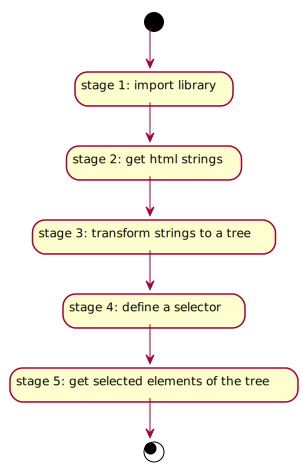

In [2]:
%%plantuml
@startuml
(*)--> "stage 1: import library"
--> "stage 2: transform web page string to a tree"
--> "stage 3: define a selector"
--> "stage 4: get selected elements of the tree"
-->(*)
@enduml

* parsing 관련 라이브러리
    * HTMLParser - Python에서 **기본**으로 제공
    * BeautifulSoup - lxml을 사용해서 구현된 parser (css는 지원하지만 XPath 지원하지 않는다.)
    * lxml - C로 구현되어서 빠르다. 단독 또는 BeautifulSoup에서 사용할 수 있다. xml, html 파싱을 할 수 있다.
    * regex - HTML 파서가 아니다. 패턴으로 파싱을 한다. BeautifulSoup과 같은 파서와 결합하여 사용할 수 있다.
    * pyquery - jquery와 같은 기능의 라이브러리
    * scrapy - 프레임워크로 대규모 프로젝트에 적합하다. 파이프라인pipelines을 사용하므로 빠르다.

구분 | 라이브러리 | 설명
-----|-----|-----
웹데이터 수집 | urllib, requests, curl | 웹페이지 열고, http request(s), http response(s)
웹데이터 파싱 | HTMLParser, BeautifulSoup, lxml, regex | 문자열 또는 xml, json을 파싱
프레임워크 | scrapy (java nutch, crawler4j) | 큰 프로젝트에 사용


## 1.3 Developer tools

파싱을 하려면 **HTML 소스**를 펼쳐 놓고, '요소' 즉 element를 찾아야 편리하다. Chrome 개발자 도구를 이용하면 찾기 편리하다. 구글 사이트에 사용법이 자세하게 설명되어 있다 https://developers.google.com/web/tools/chrome-devtools/console/. 이 창에서 css selector를 테스트하고 프로그램에 넣으면 편리하다.

### 1.3.1 브라우저에서 Javascript concole 창 열기

브라우저 | 콘솔창
-----|-----
Chrome | 브라우저 우측 상단 메뉴 > More tools > Developer Tools 또는 F12
Internet Explorer | F12
Firefox | Tools > Web Developer > Inspector
Safari | advanced preferences > enable Develop menu

### 1.3.2 Javascript console 창에서 selector 찾기

콘솔창에서 javascript를 사용하여 selector를 추출할 수 있다.
**xpath는 ```$x()```**, **css selecotr는 ```$()```**를 사용한다.

단축키 | 설명
-----|-----
\$x('xpath') | XPath와 일치하는 요소의 배열을 반환
\$('selector') | CSS 선택기와 일치하는 첫 번째 요소를 반환, document.querySelector()의 단축
\$$('selector all') | CSS 선택기와 일치하는 모든 요소의 배열을 반환, document.querySelectorAll()의 단축

* HTML title을 xpath, css로 추출하는 예이다. selector 텍스트를 추출하려면 'innerText'를 사용한다.

선택 | xpath | css
-----|-----|-----
title태그 선택 | ```$x('//head/title') 또는 $x('//title')``` | ```$$('title')```
선택의 결과가 복수인 경우, 배열을 반환 | ```$x('//head/title')[0]``` | ```$$('title')[0]```
태그의 문자열을 추출 | ```$x('//head/title')[0].innerText``` | ```$$('title')[0].innerText```
       


### 1.3.3 Elements 창에서 selector 찾기

'Elements' 메뉴에서 xpath 또는 selector를 사용할 수 있다.

* html소스에서
    * html tag를 누르면 맨 앞 '...'가 생김
    * 이것을 누르면 팝업메뉴가 뜬다. 그리고 copy > xpath(또는 selector)를 선택하여 복사
* 또는 단축키 **```<CTRL-F>```**로 '검색'창을 열고 검색 문자열, xpath, selector를 입력한다.


## 1.4 dom

* HTML을 파싱해서 tree구조로 변환할 수 있다.
* 이러한 html tree구조를 **DOM, Document Object Model**이라고 한다.
* DOM의 각 노드는 html의 태그가 되고, 이를 읽어오고 쓰는 기능 API를 제공한다.
* DOM에서 특정 노드를 선택해 몇 가지 쉬운 기능을 사용해보자.
* **document.querySelector()**를 사용해 '.my'라는 클래스를 선택한다. 앞의 점이 class를 의미한다.
    * h2태그의 배경색을 파란색으로 변경하는 기능이다.

In [3]:
%%HTML
<html>
<body>
<h2 class="my">Turn this into blue</h2>
<button onclick="myFunction()">Click</button>
<script>
    function myFunction() {
        document.querySelector(".my").style.backgroundColor = "blue";
    }
</script>
</body>
</html>

* **document.getElementById()**를 사용해 p2라는 명칭을 선택한다. 
    * id가 p2인 ```<p>```태그를 빨간새으로 변경한다.

In [59]:
%%HTML
<html>
<body>
    <b><!--This page is to show how to use BeautifulSoup--></b>
    <p id="p2">Hello World!</p>
    <script>
        document.getElementById("p2").style.color = "RED";
    </script>
    <p>Hello World turned into RED!</p>
</body>
</html>

## 1.5 BeautifulSoup

BeautifulSoup은 Python에서 사용하는 html, xml 파서이다. Java로 만들어진 jsoup도 유사한 기능을 가지고 있다. 이전 버전은 더 이상 지원되지 않으므로, 버전은 4로 한다.

### 1.5.1 설치

명령창에서 pip로 설치한다. 'sudo'는 관리자 권한이다. 윈도우 Anaconda는 기본 설치되어 있다.
```python
pip install beautifulsoup4 (beautifulsoup은 버전3을 설치한다)
```

Linux Ubuntu에서 apt를 사용하여 설치할 수 있다.
```python
apt install python-bs4 (Python 2을 사용하는 경우)
apt install python3-bs4 (Python 3을 사용하는 경우)
```

* 파서를 넣어주지 않으면 기본 파서를 사용한다.

파서 | 설치 | 설정
-----|-----
html.parser | Python에 내장 | BeautifulSoup(markup, "html.parser")
lxml parser | C로 만든 파서, 별도 설치가 필요 | BeautifulSoup(markup, "lxml")

* Linux Ubuntu에서 'lxml' 설치

```python
apt-get install python-lxml
```

* 파이썬 패키지 저장소에서 'lxml' 설치

```python
pip install lxml
```

* BeautifulSoup은 html을 DOM으로 변환하여, 다음 4가지 객체를 생성하여 활용한다.

객체 | 설명
-----|-----
BeautifulSoup | html을 DOM으로 변환한 문서 전체를 말한다. 아래에서 파싱한 결과가 들어있는 'soup' 이다.
Tag | html 태그이다. 태그명, 태그속성, 태그의 텍스트를 가지고 있다.
NavigableString | Python에서 사용하는 unicode 문자열과 유사하지만, 몇 가지 추가되는 기능을 제공한다.
Comment | html comment, 도움말을 뜻한다. 

### 1.5.2 BeautifulSoup 객체

* BeautifulSoup 라이브러리를 **from ... import ...** 호출방식으로 사용한다.
* 예를 들어 my.py에서 x.py를 호출한다고 하자.
    * (1) x.py가 import y를 가지고 있다고 하자.
    * (2) my.py에서 x.py는 import mylib.x라고 불러 사용할 수 있다.
    * (3) 그러면 x.py에서 가지고 있는 import y는 오류가 된다. 즉, 상대호출이라서 from mylib import y로 변경해 주어야 맞다.

```python
my.py        # (2) 여기서 x.py를 호출하려면 import mylib.x는 오류(x) 
mylib\
      x.py   # (1) 여기 import y를 가지고 있다고 하자. (3) import y -> from mylib import y (o)
      y.py
```

In [2]:
_html="""<html>
<body>
    <b><!--This page is to show how to use BeautifulSoup--></b>
    <p id="p2">Hello World!</p>
    <script>
        document.getElementById("p2").style.color = "RED";
    </script>
    <p>Hello World turned into RED!</p>
</body>
</html>"""

In [3]:
from bs4 import BeautifulSoup
soup=BeautifulSoup(_html,"html.parser")

In [4]:
soup.name

u'[document]'

In [5]:
print soup.prettify()

<html>
 <body>
  <b>
   <!--This page is to show how to use BeautifulSoup-->
  </b>
  <p id="p2">
   Hello World!
  </p>
  <script>
   document.getElementById("p2").style.color = "RED";
  </script>
  <p>
   Hello World turned into RED!
  </p>
 </body>
</html>


### 1.5.3 태그 객체

HTML 태그의 객체이다. 태그명, 속성, 텍스트 등을 읽을 수 있다.

구분 | 설명
-----|-----
soup.p | dot 연산자를 사용해 태그를 읽을 수 있다. 태그 자체를 읽으며 여러 개가 있더라도 처음 태그를 읽어 온다.
soup.p.attrs | 태그의 속성을 dictionary 구조로 읽는다.
soup.p['id'] | 태그의 속성을 dictionary 구조로 []괄호를 사용하여 읽는다.

soup은 DOM을 가지고 있고, 그 중 'p' 태그객체를 살펴 보자.
파싱을 하면서 자신이 어떤 타잎을 다루고 있는지 알고 있는 편이 좋다.
'soup.p'의 type을 확인하면, 아래와 같이 **bs4.element.Tag**이다.

In [64]:
print type(soup.p)

<class 'bs4.element.Tag'>


soup.p 태그객체의 속성을 HTML 소스에서 확인해보자.
속성은 'id'가 하나만 있고, 그 값을 알아볼 수 있다.
또한 부모객체를 알아볼 수 있다. 계층을 하나 위 부모는 'body' 태그가 된다.

In [65]:
print soup.p
print soup.p.attrs
print soup.p['id']

<p id="p2">Hello World!</p>
{u'id': u'p2'}
p2


In [77]:
print soup.p.parent

<body>
<b><!--This page is to show how to use BeautifulSoup--></b>
<p id="p2">Hello World!</p>
<script>
        document.getElementById("p2").style.color = "RED";
    </script>
<p>Hello World turned into RED!</p>
</body>


### 1.5.4 문자열 객체

* 태그의 텍스트를 '.string'으로 읽을 수 있다.

In [67]:
print type(soup.p.string)

<class 'bs4.element.NavigableString'>


In [68]:
print soup.p.string

Hello World!


### 1.5.5 Comment 객체

html 문서에 도움말을 넣을 경우, <!–– 도움말 ––> 태그를 사용한다.

In [81]:
print type(soup.b.string)
print soup.b.string

<class 'bs4.element.Comment'>
This page is to show how to use BeautifulSoup


### 1.5.6 찾기

find() 또는 find_all() 함수를 사용한다.
**문자열이 아니라, 태그**를 찾아 준다.
조건은 함수 인자에 적는다. 태그명, 태그속성을 **'=' 또는 dictionary 형식**으로 적는다.

In [85]:
print soup.find("p")

<p id="p2">Hello World!</p>


In [87]:
print soup.find("p",id="p2")

<p id="p2">Hello World!</p>


In [88]:
p2tag=soup.find("p", {"id":"p2"})
print type(p2tag)
print p2tag.text     # 모든 child의 string을 출력
print p2tag.string   # 해당 Tag의 string을 출력

<class 'bs4.element.Tag'>
Hello World!
Hello World!


* text vs string
    * string은 해당 태그만 (child tag 제외)
    * text는 child의 text까지 합성해서 돌려줌.

In [16]:
myhtml="""<td>cell 1</td>
<td></td>
<td><bold>bold cell 3</bold></td>
<td>cell 4<bold>bold text</bold></td>"""

In [17]:
from bs4 import BeautifulSoup
soup=BeautifulSoup(myhtml,"html.parser")
_td=soup.find_all("td")

In [18]:
for e in _td:
    print e.text

cell 1

bold cell 3
cell 4bold text


In [19]:
for e in _td:
    print e.string

cell 1
None
bold cell 3
None


## 문제 웹데이터-1: python.org 페이지가 가지고 있는 최근 뉴스 출력하기

### 문제

크롤링하려는 'www.python.org'는 파이썬 언어에서 운영하는 홈페이지이므로 자주 방문한게 된다.
여기서 이 페이지가 포함하는 '최신 뉴스'를 알아보려고 한다.
문제를 풀기 전에 'python.org'를 웹브라우저에서 방문한다.
'Latest News'를 찾고 그 아래 뉴스를 읽어본다.

### 풀이

BeautifulSoup을 사용하여 html을 DOM으로 파싱하고, 원하는 태그를 찾는다.
우선 '소스보기'에서 원하는 태그를 찾아서, 그 태그를 조건으로 넣어야 편리하다.

In [89]:
import requests
r = requests.get('http://python.org/')
page=r.text

In [90]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page,"html.parser")

* 원하는 태그를 찾으면, class 'blog-widget'이라는 것을 알 수 있다.
* class 다음에는 '_'를 넣어 준다. 또는 key-value 형식으로 맞추어 준다.

In [160]:
news=soup.find("div", class_="blog-widget")

In [161]:
print news.li.time['datetime']

2017-09-16T21:58:00.000005+00:00


In [182]:
print news.li.a.string

The latest bugfix release in the Python 2.7 series, Python ...


In [192]:
print news.find_all("li")

[<li>\n<time datetime="2017-09-16T21:58:00.000005+00:00"><span class="say-no-more">2017-</span>09-16</time>\n<a href="http://feedproxy.google.com/~r/PythonInsider/~3/3SUhDRzB1-s/python-2714-released.html">The latest bugfix release in the Python 2.7 series, Python ...</a></li>, <li>\n<time datetime="2017-09-07T00:13:00.000003+00:00"><span class="say-no-more">2017-</span>09-07</time>\n<a href="http://feedproxy.google.com/~r/PythonInsider/~3/pUndlLcEcKE/python-337rc1-is-now-available-prior-to.html">Python 3.3.7rc1 is now available, the release candidate of Python ...</a></li>, <li>\n<time datetime="2017-08-27T03:41:00.000006+00:00"><span class="say-no-more">2017-</span>08-27</time>\n<a href="http://feedproxy.google.com/~r/PythonInsider/~3/pe2Ug4MA0Lg/python-2714-release-candidate-1.html">The first release candidate for Python 2.7.14 is now available ...</a></li>, <li>\n<time datetime="2017-08-09T07:34:00.000002+00:00"><span class="say-no-more">2017-</span>08-09</time>\n<a href="http://fee

* 지금까지 찾은 항목을 for 문으로 모두 출력한다.

In [191]:
for e in news.find_all("li"):
    print e.time["datetime"], e.a.string

2017-09-16T21:58:00.000005+00:00 The latest bugfix release in the Python 2.7 series, Python ...
2017-09-07T00:13:00.000003+00:00 Python 3.3.7rc1 is now available, the release candidate of Python ...
2017-08-27T03:41:00.000006+00:00 The first release candidate for Python 2.7.14 is now available ...
2017-08-09T07:34:00.000002+00:00 Python 3.5.4 and Python 3.4.7 are now available for download. ...
2017-07-25T08:40:00.000001+00:00 Python 3.5.4rc1 and Python 3.4.7rc1 are now available for download. ...


* 파일 버전

In [1]:
# %load src/ds3_1_readPythonOrgBS.py
#!

import requests
from bs4 import BeautifulSoup

def readLatestNews():
    try:
        r = requests.get(u'http://python.org/')
        r.raise_for_status()
    except requests.exceptions.HTTPError as e:
        print e
        sys.exit(1)
    page=r.text
    print "length: ",len(page)
    soup = BeautifulSoup(page,"html.parser")
    news=soup.find("div", class_="blog-widget")
    for e in news.find_all("li"):
	print e.time["datetime"], e.a.string

def main():
    readLatestNews()

if __name__=="__main__":
    main()



length:  49299
2018-03-31T11:56:00.000005+00:00 On behalf of the PyPA, I am pleased to announce ...
2018-03-30T01:42:00.000004+00:00 Python 3.7.0b3 is the third of four planned beta previews of Python ...
2018-03-28T21:59:00.000002+00:00 Python 3.6.5 is now available.  3.6.5 is the fifth maintenance release of ...
2018-03-26T20:59:00+00:00 The new Python Package Index at https://pypi.org is now in ...
2018-03-14T04:46:00.000002+00:00 Python 3.6.5rc1 is the first release candidate for Python 3.6.5, ...


* 추가문제: "Use Python for.."를 수집해 보자.

## 1.6 regex

* 정규식 regular expression은 문자열로 표현한 정규표현으로, 패턴매칭에 사용한다.
* 정규식을 사용하면 복잡한 패턴을 단순하게 처리할 수 있다.
* 정규식은 메타문자를 사용한다. 역슬래시 '\'와 결합하여 특별한 의미를 가진다. 예를 들어, d는 역슬래시와 결합하여 숫자를, s는 공백을 의미한다.

정규식 | 설명 | 예
-----|-----|-----
() | grouping | (\d{1,2})
\d | any character in the range 0-9 |
\s | any whitespace |
\w | any character in the range 0-9, A-Z, a-z |
[] | a signle character | [a-cx-z] = "a", "b", "c", "x", "y", or "z"
\- | range separator | [0123456789] = [0-9]
\* | the preceding element zero or more times | ab*c = "ac", "abc", "abbbc"
\+ | the preceding element one or more times  | ba+ = "ba", "baa", "baaa", and so on


### 1.6.1 문자, 순자 추출해 보기

* 정규식을 사용하면 문장에서 숫자, 문자를 편리하게 추출할 수 있다.


In [8]:
import re

sentence="Here goes my phone number 2287-1111. Nice to meet you! Merry Christmas"
regex1='\w+'
print "숫자와 문자: ",re.findall(regex1, sentence)
regex2='\d+'
print "숫자: ",re.findall(regex2, sentence)
regex3 = '[A-Z]\w+'
print "대문자를 가진 단어: ",re.findall(regex3, sentence)

숫자와 문자:  ['Here', 'goes', 'my', 'phone', 'number', '2287', '1111', 'Nice', 'to', 'meet', 'you', 'Merry', 'Christmas']
숫자:  ['2287', '1111']
대문자를 가진 단어:  ['Here', 'Nice', 'Merry', 'Christmas']


* 정규식을 사용하여 태그를 찾을 수 있다.
* a태그의 문자열을 읽어 본다.
    * a태그의 패턴을 정하고,
    * 그 안의 모든 문자 '.*'를 '()'그룹으로 추출한다.

In [8]:
import re

tags='<html><body><div>asdfasdf</div><p><a>foo</a></p></body></html>'
regex="<a>(.*)</a>"
print "a tag: ",re.findall(regex, tags)

a tag:  ['foo']


### 1.6.2 BeautifulSoup과 같이 regex를 사용

* 패턴을 가지고 있는 태그의 문자열을 찾을 수 있다.
* 패턴을 가지고 있는 태그, 속성을 검색할 수 있다.

In [7]:
from BeautifulSoup import BeautifulSoup
import re

htmlstr = """
<p>Here goes my phone number 2287-1111. Nice to meet you! Merry Christmas</p>
<p>this is text</p2>
<a href="https://www.example.com">Visit example.com</a>
"""

In [2]:
soup = BeautifulSoup(htmlstr)

In [12]:
for e in soup(text=re.compile(r'\d+')):
    print "tag: ", e.parent
    print "text: ", e

 tag:  <p>Here goes my phone number 2287-1111. Nice to meet you! Merry Christmas</p>
text:  Here goes my phone number 2287-1111. Nice to meet you! Merry Christmas


In [5]:
for e in soup.findAll(href=re.compile("ex")):
    print e.text

Visit example.com


## 1.7 xpath

xpath는 XML Path Language의 약어로 xml문서를 트리구조로 표현하고, 노드를 선택하기 위해 사용하는 조회언어이다.

* xpath 표현

Expression | 설명 | 예
---------|----------|----------
/ | root부터 선택 | ```$x('/html')``` 루트에 있는 html 선택
// | 어디에 있는지 상관없이 선택 | ```$x('//div')``` 어디에 있든 div 선택 
. | Selects the current node | 
.. | Selects the parent of the current node | 
@ | Selects attributes | //@href 속성href를 가진 모든 노드
\* | all |
@* | 속성 모두 | //div[@*] 속성을 가지고 있는 모든 div

### 1.7.1 lxml

lxml은:
* lxml.etree는 **XML**을 파싱한다. 그러나 HTMLParsor()를 사용하면 html을 파싱할 수 있다.
* lxml.html는 **HTML**을 파싱할 경우 사용한다.

BeautifulSoup은 xpath를 지원하지 않는다.
실행하는 단계는 다른 라이브러리를 사용하는 단계와 다르지 않다.
불완전한 태그일 경우 오류가 발생할 수 있다는 점에 주의한다.

구분 | 파싱 | 설명 | 읽는 함수
-----|-----|-----|-----
lxml.etree | XML | c로 구현해서 빠르다. HTMLParsor()파서를 선택하면 HTML을 파싱할 수 있다. | **파일**에서 읽기 parse()<br>**문자열**에서 읽기 fromstring() (단 html은 XML로 인식하기 때문에 HTML()함수를 사용한다.)
lxml.html | HTML | Python으로 구현 | 상동


* lxml.etree에서 HTML을 파싱하려면 HTMLParser()를 사용한다.

In [30]:
import lxml.etree
parser=lxml.etree.HTMLParser()

### 1.7.2 파일에서 파싱

* 파일에서 읽으므로 parse() 함수를 사용한다.
* 디렉토리로부터 파일을 읽을 경우, os.path.join()을 사용한다. 앞서 설명한 바와 같이 디렉토리 구분자로 인한 오류를 제거할 수 있다.
```<meta>``` 태그는'시작'은 있고, '끝' 태그가 없어 오류가 발생할 수 있다.

In [26]:
import os
tree=lxml.etree.parse(os.path.join('src','mypage2.html'),parser)

* getiterator()는 모든 태그를 읽는다.

In [32]:
for node in tree.getiterator():
    print "- 태그:", node.tag, "->", node.text

- 태그: html -> 

- 태그: head -> 

- 태그: meta -> None
- 태그: title -> My Home Page
- 태그: body -> 

- 태그: h1 -> 안녕하십니까
- 태그: p -> 오늘은 프로그래밍 하는 날...
- 태그: p -> Today we do programming...


### 1.7.2 문자열에서 파싱

* html 문자열을 파싱한다. 문자열은 파일에서 읽어서 만든다.
* 'mypage2.html'은 meta 태그를 포함하고 있어, 오류가 발생한다는 점 주의한다.

In [3]:
import lxml.etree
_html="""<html>
<body>
    <h1>안녕하세요</h1>
    <b><!--This page is to show how to use BeautifulSoup--></b>
    <p id="p2">Hello World!</p>
    <script>
        document.getElementById("p2").style.color = "RED";
    </script>
    <p>Hello World turned into RED!</p>
</body>
</html>"""
tree=lxml.etree.fromstring(_html)
for node in tree.getiterator():
    print "- 태그:", node.tag, node.attrib

- 태그: html {}
- 태그: body {}
- 태그: h1 {}
- 태그: b {}
- 태그: <cyfunction Comment at 0x7f6cc97cf590> <lxml.etree._ImmutableMapping object at 0x7f6cc97a1790>
- 태그: p {'id': 'p2'}
- 태그: script {}
- 태그: p {}


* 트리구조로 만드는 작업을 하고 난 후 xpath를 사용할 수 있다.
* xpath를 사용하여 h1 태그의 문자열을 읽는다.
* unicode값이 반환된다. 또한 배열로 만들어져 있다는 점에 주의한다.

In [4]:
tree=lxml.etree.fromstring(_html)
print tree.xpath('//h1/text()')

[u'\uc548\ub155\ud558\uc138\uc694']


In [5]:
print tree.xpath('//h1/text()')[0]

안녕하세요


## 1.8 css selectors

CSS는 html의 스타일을 정하는 규칙을 가지고 있다. 스타일 태그의 선택자 selector를 사용하여, 원하는 태그를 추출할 수 있다.

* [css selectors](http://www.w3schools.com/cssref/css_selectors.asp)

selector | css | 설명 | xpath
------------|------------|------------|------------
[attribute] | $$('input[type="email"]') | input type을 선택 | $x('//input[@type="email"]')
type | 'div' 'a' | div 태그, a 태그 | '//div' '//a'
class | '.foo' | class 속성이 foo를 선택 | '//*[@class="foo"]'
id | '#foo' | id foo (1개만 선택. 클래스는 여러 개 선택) | '//*[@id="foo"]'
universal | '*' | all | '//*'
descendents | 'div a' | all a's inside div (여러 세대 떨어져도 선택) | '//div//a' 
child | 'div > a' | a's only children to the div (1세대 다음) | '//div/a'
parents | a ~ b | any parents of b (여러 세대 위) |
grouped | 'h1, h2' | 'h1 h2' |
text | 'a::text' | 선택한 노드, element의 text.<br>javascript console에서는 'innerText' | '//a/text()'

### 1.8.1 html에서 css

css는 Cascading Style Sheets, html문서의 스타일을 설정한다. html 색, 폰트 등 어떻게 보여지는지를 정한다. 아래는 css를 html에 넣어서 태그의 스타일을 설정하고 있다.

In [15]:
%%writefile src/mypage3.html
<!DOCTYPE html>
<html>
<head>
    <meta charset="UTF-8">
    <title>My Home Page</title>
    <style>
        h1 {
            text-align: center;
            color:red;
            font-family: 'Droid Sans', sans-serif;
        };  
    </style>
</head>
<body>
    <h1>안녕하십니까</h1>
    <p>오늘은 프로그래밍 하는 날...</p>
    <p>Today we do programming...</p>

    <div id="divid">
        <h2>Hello h2</h2>
        <p>Here we use div id.</p>
        <a href="https://www.example.com">Visit example.com</a>
    </div>
    <div class="divclass">
        <h2>Welcome</h2>
        <p>Here we use div class.</p>
        <ul>
            <li>first</li>
            <li>second</li>
        </ul>
    </div>

    <form action="">
    Email <input type="email" value="emailvalue" name="emailname" id="emailid"
        class="emailclass" style="background-color: green;"required>
    Zip Code <input type="number" name="zipname" required>
    <textarea rows="4" columns="50"></textarea>
    <input type="submit" value="Submit">
    </form>
</body>
</html>

Writing src/mypage3.html


### 1.8.2 lxml을 사용해서 하기

* lxml.html을 사용한다. lxml.html은 파이썬으로 만들어졌다.
* cssselect 라이브러리가 없는 경우에는 pip를 사용해서 설치한다.
```python
pip install lxml cssselect
```

* 리눅스에서는 xml라이브러리가 필요하다.
```python
sudo apt-get install libxml2-dev libxslt1-dev
pip install lxml cssselect
```

* lxml은 broken html을 처리할 수 있다. 시작-끝 태그로 구성되지 않은 meta 태그가 오류 없이 처리된다.

In [1]:
htmlstr="""<!DOCTYPE html>
<html>
<head>
<meta charset="UTF-8">
<title>My Home Page</title>
</head>
<body>
<h1>안녕하십니까</h1>
<p>오늘은 프로그래밍 하는 날...</p>
<p>Today we do programming...</p>
</body>
</html>"""

In [2]:
import lxml.html
tree = lxml.html.fromstring(htmlstr)

* nth-child(2)는 부모의 2번째 child를 선택한다. 부모 body의 2번째 p 태그이다.

In [10]:
for e in tree.cssselect('body :nth-child(1)'):
    print e.text

안녕하십니까


In [13]:
for e in tree.cssselect('body :nth-child(2)'):
    print e.text

오늘은 프로그래밍 하는 날...


In [18]:
for e in tree.cssselect('body h1'):
    print e.text

안녕하십니까


### 1.8.3 BeautifulSoup을 사용해서 하기

BeautifulSoup도 css selector를 지원한다. 사용하는 방법은 lxml과 유사하다. 같이 비교하면서 사용해 본다.

In [21]:
from bs4 import BeautifulSoup
soup=BeautifulSoup(htmlstr,"lxml")

In [22]:
for e in soup.select('body h1'):
    print e.text

안녕하십니까


### 1.8.4 테이블을 읽기

테이블은 데이터를 행과 열로 표현하는 방식으로, 웹페이지에서 자주 사용되고 있다.

아래와 같이 table은 헤더(thead)와 내용(tbody)으로 구분하고 있다.
경우에 따라 tbody는 생략할 수 있다. thead가 없는 경우 또는 tbody 다음 첫 줄이 tr인 경우가 그렇다.
css selector를 사용하면 행은 'tr', 셀은 'td'로 검색한다.
특정 항목을 선택할 때는 BeautifulSoup은 'nth-child'는 지원하지 않으므로, 'nth-of-type'을 사용한다.

구분 | css selector
-----|-----
테이블 행 검색 | tbody tr
테이블 첫행 검색 | tbody tr:nth-of-type(1)
테이블 셀 검색 | tbody tr td
테이블 첫셀 검색 | tbody tr td:nth-of-type(1)


In [16]:
# %load src/ds3_5_testTable.py
#!

import requests
from bs4 import BeautifulSoup

tableHtml="""
<table id='thetable'>
    <thead>
        <tr>
            <th>Head 1</th>
            <th>Head 2</th>
            <th>Head 3</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Cell 11</td>
            <td>Cell 12</td>
            <td>Cell 13</td>
        </tr>
        <tr>
            <td>Cell 21</td>
            <td>Cell 22</td>
            <td>Cell 23</td>
        </tr>
        <tr>
"""

def do():
    soup=BeautifulSoup(tableHtml,"html.parser")
    my1=soup.select("#thetable tbody tr td:nth-of-type(1)")
    print "\nexpecting Cell 11 -> ", my1
    my2=soup.select("#thetable > tbody > tr:nth-of-type(1)")
    print "\nexpecting Cell 11 12 13 -> ", my2
    for e in my2:
        #print e.string -> does not print
        print e.text
    my3=soup.select("#thetable tbody tr")
    print "Num Table Rows:", len(my3)
    for e in my3:
        row=e.get_text().split('\n')
        for cell in row:
            print cell,  

def main():
    do()

if __name__=="__main__":
    main()



expecting Cell 11 ->  [<td>Cell 11</td>]

expecting Cell 11 12 13 ->  [<tr>\n<td>Cell 11</td>\n<td>Cell 12</td>\n<td>Cell 13</td>\n</tr>]

Cell 11
Cell 12
Cell 13

Num Table Rows: 3
 Cell 11 Cell 12 Cell 13   Cell 21 Cell 22 Cell 23   


## 문제 웹데이터-2: python.org 페이지가 가지고 있는 http url 출력하기

### 문제

파이썬 홈페이지 'www.python.org' 가 포함하는 링크를 찾아 보려고 한다.
웹브라우저를 열고 'python.org'라고 입력해 보자.
마우스를 가져가면 하이퍼링크가 활성화된다. 이런 링크를 가져오는 것이 문제이다.
링크는 문서내의 다른 장소로 이동하거나 다른 웹페이지로 이동하는 기능을 제공한다.
다른 페이지로 이동하는 링크만 출력한다.
* 전체 링크의 갯수
* 다른 페이지로 가는 링크 목록

웹브라우저 메뉴에서 소스보기를 클릭하면 html 소스를 볼 수 있다. 하나씩 세어도 답을 할 수 있지만 프로그램으로 하면 시간, 노력, 오류를 줄일 수 있다.

### 풀이

주소창에 url을 입력하고 웹페이지를 요청하는 것과 같이 Python.org페이지를 크롤링해 온다. 다음 방식으로 해 본다.
* BeautifulSoup
* regex
* xpath
* css selector

### BeautifulSoup

* requests로 url의 페이지를 가져와서, 그 페이지를 BeautifulSoup으로 parsing한다.
* 위 예제, p 태그의 처음에 있는 strong 태그 가져오기
* 파서 'lxml'을 넣어서 사용한다.

In [15]:
import requests
r = requests.get('http://python.org/')
_html=r.text

In [2]:
from bs4 import BeautifulSoup
#soup = BeautifulSoup(_html,"html.parser")
soup=BeautifulSoup(_html, "lxml")

In [4]:
print soup.prettify()[0:500]

<!DOCTYPE html>
<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->
<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->
<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" dir="ltr" lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <link href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.mi


* BeautifulSoup find_all('a') 함수로 'a' 태그를 가져온다.
* 'a' 태그가 수 백개가 되므로, 20개만 출력한다. 전체 개수는 맨 마지막 줄에 출력한다.
* 'a href'의 출력을 살펴 보자.
    * #, javascript 함수, local links, external links

In [5]:
for counter,link in enumerate(soup.find_all('a')):
    if(counter<20):
        print counter,link.get('href')

0 #content
1 #python-network
2 /
3 /psf-landing/
4 https://docs.python.org
5 https://pypi.python.org/
6 /jobs/
7 /community/
8 #top
9 /
10 #site-map
11 #
12 javascript:;
13 javascript:;
14 javascript:;
15 #
16 http://plus.google.com/+Python
17 http://www.facebook.com/pythonlang?fref=ts
18 http://twitter.com/ThePSF
19 /community/irc/


In [6]:
from urllib import urlopen
from bs4 import BeautifulSoup
#_html = urlopen("http://en.wikipedia.org/wiki/Kevin_Bacon")
_html = urlopen("http://en.wikipedia.org/wiki/HTML").read()
tree = BeautifulSoup(_html, "lxml")
counter=0
for link in tree.findAll("a"):
    if 'href' in link.attrs:
        if counter<20:
            print counter, link.attrs['href']
        counter+=1
print "Total: ", counter

0 /wiki/Wikipedia:Protection_policy#semi
1 #mw-head
2 #p-search
3 /wiki/HTM_(disambiguation)
4 /wiki/Help:HTML_in_wikitext
5 /wiki/File:HTML.svg
6 /wiki/Filename_extension
7 /wiki/Media_type
8 /wiki/Type_code
9 /wiki/World_Wide_Web_Consortium
10 /wiki/WHATWG
11 /wiki/Software_release_life_cycle
12 /wiki/HTML5
13 #cite_note-1
14 /wiki/Document_file_format
15 /wiki/Standard_Generalized_Markup_Language
16 /wiki/XHTML
17 /wiki/International_standard
18 http://www.w3.org/TR/html/
19 http://whatwg.org/html
Total:  1761


### 파일 버전

* r.text는 unicode, r.content는 bytes로 Response를 받아온다.
* 페이지를 읽을 경우, 발생오류에 대한 예외처리 try-except를 넣었다.
* href link만 세어서 출력한다. 2018년 4월 205개이다.

In [2]:
# %load src/ds2_1_crawlLink.py
#!

import requests
from bs4 import BeautifulSoup

def readPythonOrg():
    try:
        r = requests.get(u'http://python.org/')
        r.raise_for_status()
    except requests.exceptions.HTTPError as e:
        print e
        sys.exit(1)
    soup=BeautifulSoup(r.content,"lxml")
    my=soup.select("a")
    ahref=soup.find_all('a', href=True)
    print "total number of links:",len(my)


def main():
    readPythonOrg()

if __name__=="__main__":
    main()



total number of links: 205


### regex

문자열에 포함된 패턴으로 태그 또는 추출할 데이터를 인식할 수 있다.
HTML 파서를 사용하여 태그를 추출하는 것에 비해 불편하다.
'http://' 패턴을 추출하므로 결과가 다를 수 있다.

In [52]:
import re
#p=re.compile('http://.+"')
p=re.compile('href="(http://.*?)"')
nodes=p.findall(_html)
print "http url은 몇 개?",len(nodes)
for i, node in enumerate(nodes):
    print i, node

http url은 몇 개? 43
0 http://www.ie6countdown.com/
1 http://browsehappy.com/
2 http://www.google.com/chromeframe/?redirect=true
3 http://plus.google.com/+Python
4 http://www.facebook.com/pythonlang?fref=ts
5 http://twitter.com/ThePSF
6 http://brochure.getpython.info/
7 http://wiki.python.org/moin/Languages
8 http://python.org/dev/peps/
9 http://planetpython.org/
10 http://pyfound.blogspot.com/
11 http://pycon.blogspot.com/
12 http://docs.python.org/3/tutorial/introduction.html#using-python-as-a-calculator
13 http://blog.python.org
14 http://feedproxy.google.com/~r/PythonInsider/~3/pUndlLcEcKE/python-337rc1-is-now-available-prior-to.html
15 http://feedproxy.google.com/~r/PythonInsider/~3/pe2Ug4MA0Lg/python-2714-release-candidate-1.html
16 http://feedproxy.google.com/~r/PythonInsider/~3/vY72b719CGk/python-354-and-python-347-are-now.html
17 http://feedproxy.google.com/~r/PythonInsider/~3/ry7faTWPZiY/python-354rc1-and-python-347rc1-are-now.html
18 http://feedproxy.google.com/~r/PythonInsider

* regex를 사용해서 h1, p 태그 값을 가져오기

In [4]:
import re
p=re.compile('<h1>(.*?)</h1>')
h1tags=p.findall(_html)
for tag in h1tags:
    print tag

Functions Defined
Compound Data Types
Intuitive Interpretation
Quick &amp; Easy to Learn
All the Flow You&rsquo;d Expect


In [4]:
import re
p=re.compile('<p>(.*?)</p>')
ptags=p.findall(_html)

In [3]:
print len(ptags)

18


In [5]:
print ptags[0]

<strong>Notice:</strong> While Javascript is not essential for this website, your interaction with the content will be limited. Please turn Javascript on for the full experience. 


### xpath로 해보기

* lxml.etree를 사용해 html을 파싱해서 자료 가져오기 (위에서 읽어온 html 변수를 사용)
* xpath
```
$x('//*[@href]')
```

In [18]:
print type(_html)

<type 'str'>


In [19]:
print len(_html)

319299


* lxml.etree.HTML()
    * lxml.etree는 XML, HTML 모두 파싱할 수 있지만 사용하는 파서를 XMLParser(), HTMLParser()로 사전에 설정해야 오류가 발생하지 않는다.
    * lxml.etree 대신 Python으로 만들어진 lxml.html을 사용하여 HTML을 처리할 수도 있다. 

문자를 읽는 함수 | 설명
-----|-----
etree.HTML() | html 문자열을 처리하는 경우 사용한다. 이러한 점에서 etree.fromstring()과 비슷하지만 HTMLParser()로 파싱을 하게 된다.
etree.fromstring() | etree는 XML을 처리하는 객체. etree.fromstring()은 HTML 태그를 읽으면 오류를 발생하게 된다 (아래 참조).


etree.fromstring()으로 HTML을 읽으면 오류가 발생한다.
etree.HTML()으로 읽어야 한다. 읽고 결과를 tostring()으로 써본다.

In [16]:
from lxml import etree
_htmlTree = etree.fromstring(_html)   # error for reading html from lxml.etree
result = etree.tostring(_htmlTree, pretty_print=True, method="html")

XMLSyntaxError: StartTag: invalid element name, line 1, column 2 (line 1)

In [17]:
from lxml import etree
_htmlTree = etree.HTML(_html)
result = etree.tostring(_htmlTree, pretty_print=True, method="html")

In [20]:
nodes=_htmlTree.xpath('//*[@href]')

for i, node in enumerate(nodes):
    if i<20:
        print i, node.attrib

0 {'href': '//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js', 'rel': 'prefetch'}
1 {'href': '/static/stylesheets/style.css', 'type': 'text/css', 'rel': 'stylesheet', 'title': 'default'}
2 {'media': 'not print, braille, embossed, speech, tty', 'href': '/static/stylesheets/mq.css', 'type': 'text/css', 'rel': 'stylesheet'}
3 {'href': '/static/favicon.ico', 'type': 'image/x-icon', 'rel': 'icon'}
4 {'href': '/static/apple-touch-icon-144x144-precomposed.png', 'rel': 'apple-touch-icon-precomposed', 'sizes': '144x144'}
5 {'href': '/static/apple-touch-icon-114x114-precomposed.png', 'rel': 'apple-touch-icon-precomposed', 'sizes': '114x114'}
6 {'href': '/static/apple-touch-icon-72x72-precomposed.png', 'rel': 'apple-touch-icon-precomposed', 'sizes': '72x72'}
7 {'href': '/static/apple-touch-icon-precomposed.png', 'rel': 'apple-touch-icon-precomposed'}
8 {'href': '/static/apple-touch-icon-precomposed.png', 'rel': 'apple-touch-icon'}
9 {'href': '/static/humans.txt', 'rel': 'author'}
10 {'h

### css selector

* css select
    ```
    $$('a[href]')
    ```

In [25]:
import lxml.html
from lxml.cssselect import CSSSelector
import requests
r = requests.get('http://python.org/')

html = lxml.html.fromstring(r.text)
sel=CSSSelector('a[href]')
# Apply the selector to the DOM tree.
nodes = sel(html)

In [23]:
print len(nodes)
for i,node in enumerate(nodes):
    #print lxml.html.tostring(item)
    if i<20:
        print i, node.get('href'), node.text

197
0 #content Skip to content
1 #python-network 
                    
2 / Python
3 /psf-landing/ PSF
4 https://docs.python.org Docs
5 https://pypi.python.org/ PyPI
6 /jobs/ Jobs
7 /community/ Community
8 #top 
                    
9 / None
10 #site-map None
11 # None
12 javascript:; Smaller
13 javascript:; Larger
14 javascript:; Reset
15 # Socialize
16 http://plus.google.com/+Python None
17 http://www.facebook.com/pythonlang?fref=ts None
18 http://twitter.com/ThePSF None
19 /community/irc/ None


## 문제 웹데이터-3: 위키에서 'python'을 검색해서 http url을 출력하기

### 문제

위키페이지는 집단지성을 대표하는 사이트이다. Python 페이지로 가서 다음을 출력한다.
* 소개글
* 다른 페이지로 가는 링크 목록

웹브라우저 메뉴에서 소스보기를 클릭하면 html 소스를 볼 수 있다. 하나씩 세어도 답을 할 수 있지만 프로그램으로 하면 시간, 노력, 오류를 줄일 수 있다.

### 해결

* BeautifulSoup, lxml 라이브러리를 사용해 csss selector 첫째 문단과 링크 목록을 출력한다.

### BeautifulSoup

위키에서 검색결과를 가져온다.
결과페이지에서 데이터 추출에 필요한 css selector를 정한다.

In [6]:
import requests
r = requests.get('https://en.wikipedia.org/wiki/Python_(programming_language)')

In [7]:
from bs4 import BeautifulSoup
soup=BeautifulSoup(r.text,"lxml")

* 소스보기를 해서 가져오려는 태그의 css selector를 찾는다.
* Chrome javascript console > 태그 하이라이트 > '...'에서 오른쪽 버튼 > copy > copy selector

In [9]:
results=soup.select('div #mw-content-text p')

가져온 문단은 78개, 그 가운데 5개만 출력해 본다.

In [13]:
print "Number of paragraphs: ", len(results)
for e in results[0:5]:
    print e.get_text().strip()

Number of paragraphs:  78
Python is a widely used high-level programming language for general-purpose programming, created by Guido van Rossum and first released in 1991. An interpreted language, Python has a design philosophy that emphasizes code readability (notably using whitespace indentation to delimit code blocks rather than curly brackets or keywords), and a syntax that allows programmers to express concepts in fewer lines of code than might be used in languages such as C++ or Java.[23][24] The language provides constructs intended to enable writing clear programs on both a small and large scale.[25]
Python features a dynamic type system and automatic memory management and supports multiple programming paradigms, including object-oriented, imperative, functional programming, and procedural styles. It has a large and comprehensive standard library.[26]
Python interpreters are available for many operating systems, allowing Python code to run on a wide variety of systems. CPython, 

* http 링크를 검색한다. css a[href^="http"]를 사용한다. 즉 http로 시작하는 문자열 값을 가진 href를 의미한다.
여기서 따옴표를 지키도록 한다. "a[href^='http']"는 틀린 문법이다.

In [14]:
links=soup.select('a[href^="http"]')

### 위키에서 lxml css.selector

lxml.html.fromstring() 함수로 HTML을 파싱하고, cssselect()로 추출한다.

In [1]:
import lxml.html
from lxml.cssselect import CSSSelector

# build the DOM Tree
tree = lxml.html.fromstring(r.text)
# print the parsed DOM Tree
#print lxml.html.tostring(tree)

In [2]:
results=tree.cssselect('div #mw-content-text p') 

In [6]:
# print the HTML for the first result.
match = results[2]
print lxml.html.tostring(match)

<p>Python interpreters are available for many <a href="/wiki/Operating_system" title="Operating system">operating systems</a>, allowing Python code to run on a wide variety of systems. <a href="/wiki/CPython" title="CPython">CPython</a>, the <a href="/wiki/Reference_implementation" title="Reference implementation">reference implementation</a> of Python, is <a href="/wiki/Open_source" class="mw-redirect" title="Open source">open source</a> software<sup id="cite_ref-27" class="reference"><a href="#cite_note-27">[27]</a></sup> and has a community-based development model, as do nearly all of its variant implementations. CPython is managed by the non-profit <a href="/wiki/Python_Software_Foundation" title="Python Software Foundation">Python Software Foundation</a>.</p>



In [7]:
# print the text of the first result.
print match.text

Python interpreters are available for many 


* 파일 버전
* 2018년 4월 81개의 문단을 출력한다.

In [ ]:
# %load src/ds3_3_readWiki.py
#!

import requests
from bs4 import BeautifulSoup
import lxml.html
#from lxml.cssselect import CSSSelector

# build the DOM Tree
# print the parsed DOM Tree
#print lxml.html.tostring(tree)

def readWikiLxml():
    try:
        r = requests.get('https://en.wikipedia.org/wiki/Python_(programming_language)')
        r.raise_for_status()
    except requests.exceptions.HTTPError as e:
        print e
        sys.exit(1)
    tree = lxml.html.fromstring(r.text)
    results=tree.cssselect('div #mw-content-text p')
    print "Number of paragraphs: ", len(results)
    for e in results:
        print e.text

def readWikiBS():
    try:
        r = requests.get('https://en.wikipedia.org/wiki/Python_(programming_language)')
        r.raise_for_status()
    except requests.exceptions.HTTPError as e:
        print e
        sys.exit(1)
    soup=BeautifulSoup(r.text,"lxml")
    results=soup.select('div #mw-content-text p')
    print "Number of paragraphs: ", len(results)
    for e in results:
        print e.get_text().strip()
    links=soup.select('a[href^="http"]')
    #links=soup.select("a[href^='http']") -> not working
    print "total links: ",len(links)
    for e in links:
        print e

def main():
    #readWikiLxml()
    readWikiBS()

if __name__=="__main__":
    main()


## 문제 웹데이터-4: 한국 포털사이트에서 노래제목을 검색해서 가져오기

### 문제

노래는 개인의 선호가 뚜렸하고 '좋아하는 노래'가 있기 마련이다. 개인이 선호하는 또는 행사에 어울리는 노래를 골라주는 '추천' 알고리즘이 사용되기도 한다. 이런 추천기술은 다음에 배우기로 하고, 여기서는 '비 오는' 단어를 포하하는 노래를 검색하기로 한다.
주의: 음악에는 저작권이 있다. 이 예제는 교육을 목적으로 하는 실습이다. 상업용으로 사용할 경우는 저작권을 위반하지 않아야 한다.

### 해결

* 노래 검색 사이트 url을 정한다. 네이버음악 사이트 http://music.naver.com/ 를 사용한다.
* 검색어를 정하고, 검색결과를 가져온다.
* css selector를 정해서 검색결과로부터 데이터 항목을 추출한다. 각 노래에 대해 제목, 가수, 앨범, 인기도, 가사 항목이 게시판으로 구성되어 있다. 게시판은 pagination이라고 하는 기능이 있어 여러 페이지를 반복해서 가져와야 한다.

> pagination은 검색결과가 여러 페이지일 경우 사용하는 기능이다. 검색결과가 150건 일 경우, 10개로 나누어 15페이지가 제공되는 예를 들 수 있다. '더보기', '목록번호', '맨 앞으로 이동', '맨 뒤로 이동' 등의 버튼이 제공되고 이를 사용해서 데이터를 조회할 수 있다.

### 음악 검색결과 가져오기

'네이버뮤직'에서 제공하는 검색기능을 사용해서 데이터를 가져온다.
url은 http://music.naver.com/search/search.nhn, 여기에 검색어를 넣어준다.
그 결과 15건의 노래가 검색된다.
주소창에 나타나는 url을 참조해서 프로그램에 사용하자. 여기서는 urllib대신, requests를 사용해서 해본다.

In [1]:
import requests
p = {"query": "비오는"}
naverUrl="http://music.naver.com/search/search.nhn"
r=requests.get(naverUrl,params=p)
rainPage = r.text

* 검색결과 rainPage의 전체길이와 노래제목이 있는 위치를 알아 본다.
* 개발자도구를 열어서, HTML 소스를 펼친 후 노래목록이 출력된 부분의 css selector를 선정한다. 노래제목이 출력된 부분의 문자패턴을 집어낸다.
* 문자열 찾기 기능 find()를 사용해본다.
* 30653, 30670 사이 노래제목 1건을 출력하였다. 노래제목은 공백을 포함하여 7자이다.

In [2]:
print "total length:", len(rainPage)

total length: 127905


In [3]:
pos = rainPage.find(u"트랙 리스트")
if (pos>0):
    pos = rainPage.find("_title title NPI=", pos);
    pos = rainPage.find("title=",pos+20)
    pos2 = rainPage.find("\"", pos+7)
    print u"found {0} and {1}: {2}".format(pos+7, pos2, rainPage[pos+7:pos2])


found 30663 and 30670: 비 오는 거리


### css selector

* 웹브라우저 자바스크립트 창을 열어서 css selector를 살펴본다.
* table '트랙 리스트'에 검색결과가 출력되어 있다.

CSS selectors | 설명
----------|----------
#content | id가 content인 element를 선택
#content > div:nth-child(4)' | 상위 #content의 4번째 div를 선택
div._tracklist_mytrack | div아래 _tracklist_mytrack 클래스를 선택
    

* 이번에는 css selector를 정리하여 사용해 본다. 자바스크립트 창에서 테스트를 해보면서 정리하는 것이 쉽다.

CSS selectors | 설명 | 의미
----------|----------|----------
._tracklist_move | 테이블 행을 선택 (table '트랙 리스트' tbody에 있는) | 'track' 목록
.name > a.title | 클래스 .name에 있는 a link의 title을 선택 | 노래제목
.artist | 클래스 .artist | 아티스트 (가수)
-album | 클래스 .album | 앨범

### BeautifulSoup

* 페이지에서 css selector를 넣어서 노래제목, 아티스트, 앨범 등을 가져온다.

In [12]:
from bs4 import BeautifulSoup
soup=BeautifulSoup(rainPage,"lxml")

* 제목 출력하기

In [15]:
for title in soup.select('._tracklist_move > .name > a.title'):
    print title.get_text().strip() 

비 오는 거리
비오는 날 수채화
비 오는 거리
비 오는 이런 날에
비오는 금요일
비오는 압구정
비오는 거리
비 오는 거리  (Feat. 핫펠트)
비오는 거리
비 오는 날
비오는 날엔
비 오는 거리에서
비오는 압구정
비오는 날, 산책
비 오는 날


* 검색결과가 유니코드 문자를 포함하는 것은 오류가 아니다. print문이 유니코드 출력을 지원하면 한글이 출력된다.
* 아래 'for문'은 제목을 추출해서 리스트에 추가하고 있다.

In [17]:
_selName=list()
for title in soup.select('._tracklist_move > .name > a.title'):
    _selName.append(title.get_text().strip())
print _selName

[u'\ube44 \uc624\ub294 \uac70\ub9ac', u'\ube44\uc624\ub294 \ub0a0 \uc218\ucc44\ud654', u'\ube44 \uc624\ub294 \uac70\ub9ac', u'\ube44 \uc624\ub294 \uc774\ub7f0 \ub0a0\uc5d0', u'\ube44\uc624\ub294 \uae08\uc694\uc77c', u'\ube44\uc624\ub294 \uc555\uad6c\uc815', u'\ube44\uc624\ub294 \uac70\ub9ac', u'\ube44 \uc624\ub294 \uac70\ub9ac  (Feat. \ud56b\ud3a0\ud2b8)', u'\ube44\uc624\ub294 \uac70\ub9ac', u'\ube44 \uc624\ub294 \ub0a0', u'\ube44\uc624\ub294 \ub0a0\uc5d4', u'\ube44 \uc624\ub294 \uac70\ub9ac\uc5d0\uc11c', u'\ube44\uc624\ub294 \uc555\uad6c\uc815', u'\ube44\uc624\ub294 \ub0a0, \uc0b0\ucc45', u'\ube44 \uc624\ub294 \ub0a0']


위 'for문'에서 제목을 추출해서 리스트로 만드는 3줄을 1줄로 단축할 수 있다. Python의 특징을 잘 보여주고 있다.

In [ ]:
_selName = [title.get_text().strip() for title in soup.select('._tracklist_move > .name > a.title')]

In [14]:
_selName = [title.get_text().strip() for title in soup.select('._tracklist_move > .name > a.title')]
_selArtist = [artist.get_text().strip() for artist in soup.select('._artist.artist')]
_selAlbum= [album.get_text().strip() for album in soup.select('.album > a')]
print "total number of items:",len(_selName) 
for i in range(len(_selName)):
    print _selArtist[i],'---',_selName[i],'---',_selAlbum[i]


total number of items: 15
{ARTIST} --- 비 오는 거리 --- 앨범
이승훈 --- 비오는 날 수채화 --- 1집 비오는 거리
강인원 --- 비 오는 거리 --- 비오는 날 수채화 1 OST
소울스타 (SoulstaR) --- 비 오는 이런 날에 --- 비 오는 거리
은가은 --- 비오는 금요일 --- 비 오는 이런 날에
비오는 금요일 --- 비오는 압구정 --- 비오는 금요일
브라운 아이즈 --- 비오는 거리 --- 2집 Reason 4 Breathing?
유리상자 --- 비 오는 거리  (Feat. 핫펠트) --- 유ㄹish.1 - 비오는 거리
베이빌론(Babylon) --- 비오는 거리 --- BETWEEN US
서영은 --- 비 오는 날 --- 1집 Romantic 1
오소연 --- 비오는 날엔 --- 비 오는 날
소심한 오빠들 --- 비 오는 거리에서 --- 비오는 날엔
아스트로피아노 --- 비오는 압구정 --- 비 오는 거리에서
브라운 아이즈 --- 비오는 날, 산책 --- The Very Best Of Browneyes `Take A Favorite`
모모캣츠(Momocats) --- 비 오는 날 --- 비오는 날, 산책


목록에서 '곡 더보기'를 찾아서 버튼을 눌러 본다. 주소창의 url과 params이 어떻게 변경되었는지 주의한다.

In [19]:
p = {"query": u"비오는","target":"track", "page":1}
r = requests.get(naverUrl,params=p)
soup=BeautifulSoup(r.text,"lxml")

In [20]:
_selName = [title.get_text().strip() for title in soup.select('._tracklist_move > .name > a.title')]
_selArtist = [artist.get_text().strip() for artist in soup.select('._artist.artist')]
_selAlbum= [album.get_text().strip() for album in soup.select('.album > a')]
print "total number of items:",len(_selName) 
for i in range(len(_selName)):
    print _selArtist[i],'---',_selName[i],'---',_selAlbum[i]


total number of items: 50
{ARTIST} --- 비 오는 거리 --- 앨범
이승훈 --- 비오는 날 수채화 --- 1집 비오는 거리
강인원 --- 비 오는 거리 --- 비오는 날 수채화 1 OST
소울스타 (SoulstaR) --- 비 오는 이런 날에 --- 비 오는 거리
은가은 --- 비오는 금요일 --- 비 오는 이런 날에
비오는 금요일 --- 비오는 압구정 --- 비오는 금요일
브라운 아이즈 --- 비오는 거리 --- 2집 Reason 4 Breathing?
유리상자 --- 비 오는 거리  (Feat. 핫펠트) --- 유ㄹish.1 - 비오는 거리
베이빌론(Babylon) --- 비오는 거리 --- BETWEEN US
서영은 --- 비 오는 날 --- 1집 Romantic 1
오소연 --- 비오는 날엔 --- 비 오는 날
소심한 오빠들 --- 비 오는 거리에서 --- 비오는 날엔
아스트로피아노 --- 비오는 압구정 --- 비 오는 거리에서
브라운 아이즈 --- 비오는 날, 산책 --- The Very Best Of Browneyes `Take A Favorite`
모모캣츠(Momocats) --- 비 오는 날 --- 비오는 날, 산책
김봄 --- 비오는 아침 --- 비 오는 날
재주소년 --- 비오는 압구정 --- 1집 재주소년 (才洲少年)
서영은 --- 비오는 날 --- Unforgettable No.2
루싸이트 토끼 --- 비 오는 거리에서 --- 1집 Twinkle Twinkle
이승철 --- 비오는 날엔 파전 (Feat. Wonny) --- 시간 참 빠르다
비트코인(BEATCOIN) --- 비오는 날 --- 비오는 날엔 파전
오은영 --- 비오는 날은 푸르다 --- 비오는 날
하이니(Hi.ni) --- 비 오는 날의 수채화 --- 비오는 날은 푸르다
SG 워너비 --- 비오는 거리 --- Classic Odyssey
이금성 --- 비 오는 거리 --- 비오는 거리
SG 워너비 --- 비오는날의 수채화 (Feat. 정혜민, Mi

* 연속
    * params에 track, pageNo를 추가하기
    https://www.url-encode-decode.com/에서 encode, decode기능을 제공
    * naver의 url을 관찰하면 p = {"query": u"비오는","target":"track", "page":pageNo}
    '%27%eb%b9%84%ec%98%a4%eb%8a%94%27'는 '비오는'이라는 키워드

In [ ]:
import urllib
urllib.urlencode({'query':u'비오는'.encode('utf-8')})

In [23]:
for pageNo in range(2):
    p = {"query": u"비오는","target":"track", "page":pageNo}
    r = requests.get(naverUrl,params=p)
    soup=BeautifulSoup(r.text,"lxml")
    _selName = [title.get_text().strip() for title in soup.select('._tracklist_move > .name > a.title')]
    _selArtist = [artist.get_text().strip() for artist in soup.select('._artist.artist')]
    _selAlbum= [album.get_text().strip() for album in soup.select('.album > a')]
    print "total number of items:",len(_selName) 
    for i in range(len(_selName)):
        print pageNo,'---',_selArtist[i],'---',_selName[i],'---',_selAlbum[i]


total number of items: 50
0 --- {ARTIST} --- 비 오는 거리 --- 앨범
0 --- 이승훈 --- 비오는 날 수채화 --- 1집 비오는 거리
0 --- 강인원 --- 비 오는 거리 --- 비오는 날 수채화 1 OST
0 --- 소울스타 (SoulstaR) --- 비 오는 이런 날에 --- 비 오는 거리
0 --- 은가은 --- 비오는 금요일 --- 비 오는 이런 날에
0 --- 비오는 금요일 --- 비오는 압구정 --- 비오는 금요일
0 --- 브라운 아이즈 --- 비오는 거리 --- 2집 Reason 4 Breathing?
0 --- 유리상자 --- 비 오는 거리  (Feat. 핫펠트) --- 유ㄹish.1 - 비오는 거리
0 --- 베이빌론(Babylon) --- 비오는 거리 --- BETWEEN US
0 --- 서영은 --- 비 오는 날 --- 1집 Romantic 1
0 --- 오소연 --- 비오는 날엔 --- 비 오는 날
0 --- 소심한 오빠들 --- 비 오는 거리에서 --- 비오는 날엔
0 --- 아스트로피아노 --- 비오는 압구정 --- 비 오는 거리에서
0 --- 브라운 아이즈 --- 비오는 날, 산책 --- The Very Best Of Browneyes `Take A Favorite`
0 --- 모모캣츠(Momocats) --- 비 오는 날 --- 비오는 날, 산책
0 --- 김봄 --- 비오는 아침 --- 비 오는 날
0 --- 재주소년 --- 비오는 압구정 --- 1집 재주소년 (才洲少年)
0 --- 서영은 --- 비오는 날 --- Unforgettable No.2
0 --- 루싸이트 토끼 --- 비 오는 거리에서 --- 1집 Twinkle Twinkle
0 --- 이승철 --- 비오는 날엔 파전 (Feat. Wonny) --- 시간 참 빠르다
0 --- 비트코인(BEATCOIN) --- 비오는 날 --- 비오는 날엔 파전
0 --- 오은영 --- 비오는 날은 푸르다 --- 비오는 날
0 --- 하이니(

### lxml로 해보기

In [5]:
html = lxml.html.fromstring(r.text)
nodes=html.cssselect('._tracklist_move > .name > a.title')

In [6]:
print len(nodes)

15


In [10]:
for e in nodes:
    print e.text_content()

비 오는 거리
비오는 날 수채화
비 오는 거리
비 오는 이런 날에
비오는 금요일
비오는 압구정
비오는 거리
비 오는 거리  (Feat. 핫펠트)
비오는 거리
비 오는 날
비오는 날엔
비 오는 거리에서
비오는 압구정
비오는 날, 산책
비 오는 날


In [14]:
import lxml.html
import requests

#p = {"query": u"비오는","target":"track", "page":1}
p = {"query": u"비오는","target":"track"}
r = requests.get(naverUrl,params=p)
_html = lxml.html.fromstring(r.text)

* html을 보려면
    * r.text로 보거나
    * lxml.html.tostring(_html)

In [15]:
len(lxml.html.tostring(_html))

266190

In [16]:
nodes=_html.cssselect('._tracklist_move > .name > a.title')

In [17]:
len(nodes)

50

* item.text()는 한글 문자 출력 오류
* item.text_content()를 사용해서 출력

In [9]:
for node in nodes:
    #print lxml.html.tostring(item)
    print node.text_content()

비 오는 거리
비 오는 거리
비 오는 이런 날에
비오는 압구정
비 오는 거리  (Feat. 핫펠트)
비오는 날 수채화
비오는 거리
비오는 거리
비오는 압구정
비 오는 날
비오는 아침
비오는 날엔
비오는 날
비 오는 거리에서
비 오는 거리에서
비오는 날, 산책
비 오는 날
비 오는 경리단길 (Feat. 양은선)
비오는 압구정
비오는 날
7080 가요 메들리 (지난날, 비오는 날의 수채화, 보랏빛 향기)
비오는날의 수채화 (Feat. 정혜민, Misty)
비오는 밤
비오는 날의 수채화
비 오는 날의 수채화
비 오는 거리
비오는 날은 푸르다
비오는 이른 새벽 자장가
Rainy Day (비오는 날)
비오는 금요일
I'd Love You To Want Me (CF '코업레지던스', 영화...
Rhythm Of The Rain (빗줄기의 리듬 : CF 'LG 정유...
자장가 (비오는 소리와 함께하는 아베마리아 아기 자장가)
자장가 (비오는 소리와 함께하는 고요한 밤 거룩한 밤 아기...
비오는 거리
비오는 날엔 (Feat. 어쿠스틱 콜라보)
Rain (호세 펠라치아노의 대표곡 : 레인)
House Of The Rising Sun (해뜨는 집, 드라마 '올인' OST)
California Dreamin' (캘리포니아 드림 - 영화...
비 오는 밤
자장가 (비오는 소리와 함께하는 슈베르트 아기 자장가)
비오는 일요일
자장가 (비오는 소리와 함께하는 울면 안돼 아기 자장가)
비오는 날엔
비 오는 계곡 물소리 (백색소음 화이트 노이즈 자장가)
자장가 (비오는 소리와 함께하는 모차르트 아기 자장가)
비오는 날의 수채화
비오는 날엔 막걸리 (Feat. 신승열)
Evergreen
자장가 (비오는 소리와 함께하는 위안 아기 자장가)


* 곡명, 아티스트, 앨범 모두 가져오기
    * html이 정형적이지 않아서 어렵다.
    * 2단계 작업.
        * 곡명, 아티스트, 앨범 항목을 가지고 있는 상위 태그를 먼저 선정하고, 그 안의 개별 항목을 선정한다.

In [28]:
from lxml.cssselect import CSSSelector

sel = CSSSelector('._tracklist_move')
# Apply the selector to the DOM tree.
nodes = sel(_html)
print lxml.html.tostring(nodes[0])[:500]

<tr class="_tracklist_move {TRACK_TYPE}" style="display:none;" trackdata="{TRACK_DATA}">


						
							<td class="chk"><input type="checkbox" title="&#49440;&#53469;" class="_chkbox_item input_chk {TRACK_CHECK_NCLICKS}"> </td>
						
						
							<td class="order">{TRACK_NUM}</td>
						
							<td class="name">

								{PLAY_TOGGLE}
								{ADD_TOGGLE}


								<span class="_ico_title ico_title"><img height="18" width="23" alt="TITLE" src="http://static.naver.net/nmusic/201


* 개별 항목의 선정
* 우선 1개씩 해 본다.
    * results[0]은 제목행이므로, 그 다음을 처리한다.
    * 태그가 정형적이지 않으므로, selector가 일정하지 않다는 점에 주의한다.
        * Chrome console창을 이용해서 하나씩 작업하므로, selector를 정의하는데 노력이 수반된다.

In [29]:
_selName = CSSSelector('.name > a.title')
_selArtist = CSSSelector('._artist.artist')
_selAlbum= CSSSelector('.album > a')
_name=_selName(nodes[1])
_artist=_selArtist(nodes[1])
_album=_selAlbum(nodes[1])

In [30]:
print _name[0].text_content()
print _artist[0].text_content().strip()
print _album[0].text_content()

비 오는 거리
이승훈
1집 비오는 거리


* 반복문을 이용하여 모든 노래를 출력한다.
    * if문은 노래제목이 없는 경우 제거한다 (제목 행을 제거하는 효과)

In [23]:
_selName = CSSSelector('.name > a.title')
_selArtist = CSSSelector('._artist.artist')
_selAlbum= CSSSelector('.album > a')
for node in nodes:
    #print lxml.html.tostring(item)
    _name=_selName(node)
    _artist=_selArtist(node)
    _album=_selAlbum(node)
    if _name:
        print _artist[0].text_content().strip(),
        print "---",
        print _name[0].text_content(),
        print "---",
        print _album[0].text_content()


이승훈 --- 비 오는 거리 --- 1집 비오는 거리
강인원 --- 비오는 날 수채화 --- 비오는 날 수채화 1 OST
오소연 --- 비 오는 날 --- 비 오는 날
동요시대 --- 비오는날 (동요) (멜로디 MR) --- 동요 MR반주 5
서영은 --- 비오는 거리 --- 1집 Romantic 1
루드 페이퍼(Rude Paper) --- 비오는 밤에 --- 1집 Paper Spectrum
김민우 --- 비오는 날 (Inst.) --- 비오는 날
조영순 --- 비오는 남산 --- 무진장 트롯트 골든 1＆2
베이빌론(Babylon) --- 비 오는 거리  (Feat. 핫펠트) --- BETWEEN US
브라운 아이즈 --- 비오는 압구정 --- 2집 Reason 4 Breathing?
하이니(Hi.ni) --- 비오는 날은 푸르다 --- 비오는 날은 푸르다
Richard Marx --- One More Time --- 김현주의 비오는 거리
SG 워너비 --- 비 오는 날의 수채화 --- Classic Odyssey
Romantisch Jazzkapelle --- Yesterday (비틀즈 예스터 데이 : CF `시몬스침대`) --- 뉴에이지 연가 : 비 오는 날의 거리, 추억, 그리고 아름다운 재즈 피아노(Pop 올드 팝, 클래식, 영화 OST 베스트 연주 음악)
강윤식 --- 비오는날 수채화 (발라드 Ver.) (With 김명상, 강윤식) --- 1980-2010 리뉴얼 - 내 노래 다시 부르기


### 프로그램으로 실행

* 지금까지 실행했던 명령어를 정리하여 프로그램으로 작성한다.
* 파일은 src 디렉토리에 .py 확장자로 저장한다.
* 검색어가 한글이 포함되어 있어 인코딩을 정한다. 첫째줄에 utf-8을 적어준다.
```
# coding: utf-8
```

In [5]:
# coding: utf-8
import lxml.html
import requests
from lxml.cssselect import CSSSelector

#p = {"query": u"비오는","target":"track", "page":1}
p = {"query": u"비오는","target":"track"}
naverUrl="http://music.naver.com/search/search.nhn?"
r = requests.get(naverUrl,params=p)
_html = lxml.html.fromstring(r.text)

sel = CSSSelector('table[summary] > tbody > ._tracklist_move')
# Apply the selector to the DOM tree.
nodes = sel(_html)

_selName = CSSSelector('.name > a.title')
_selArtist = CSSSelector('._artist.artist')
_selAlbum= CSSSelector('.album > a')
for node in nodes:
    #print lxml.html.tostring(item)
    _name=_selName(node)
    _artist=_selArtist(node)
    _album=_selAlbum(node)
    if _name:
        print _artist[0].text_content().strip(),
        print "---",
        print _name[0].text_content(),
        print "---",
        print _album[0].text_content()


이승훈 --- 비 오는 거리 --- 1집 비오는 거리
강인원 --- 비오는 날 수채화 --- 비오는 날 수채화 1 OST
소울스타 (SoulstaR) --- 비 오는 거리 --- 비 오는 거리
브라운 아이즈 --- 비오는 압구정 --- 2집 Reason 4 Breathing?
은가은 --- 비 오는 이런 날에 --- 비 오는 이런 날에
비트코인(BEATCOIN) --- 비오는 날엔 파전 (Feat. Wonny) --- 비오는 날엔 파전
유리상자 --- 비오는 거리 --- 유ㄹish.1 - 비오는 거리
서영은 --- 비오는 거리 --- 1집 Romantic 1
오소연 --- 비 오는 날 --- 비 오는 날
베이빌론(Babylon) --- 비 오는 거리  (Feat. 핫펠트) --- BETWEEN US
소심한 오빠들 --- 비오는 날엔 --- 비오는 날엔
비오는 금요일 --- 비오는 금요일 --- 비오는 금요일
아스트로피아노 --- 비 오는 거리에서 --- 비 오는 거리에서
브라운 아이즈 --- 비오는 압구정 --- The Very Best Of Browneyes `Take A Favorite`
김광민 --- Rainy Day (비오는 날) --- 1집 Letter From The Earth
김봄 --- 비 오는 날 --- 비 오는 날
오은영 --- 비오는 날 --- 비오는 날
모모캣츠(Momocats) --- 비오는 날, 산책 --- 비오는 날, 산책
럼블 피쉬 --- 비오는날의 수채화 (Feat. 정혜민, Misty) --- Memory For You
하이니(Hi.ni) --- 비오는 날은 푸르다 --- 비오는 날은 푸르다
재주소년 --- 비오는 아침 --- 1집 재주소년 (才洲少年)
루싸이트 토끼 --- 비오는 날 --- 1집 Twinkle Twinkle
이승철 --- 비 오는 거리에서 --- 시간 참 빠르다
이금성 --- 비오는 거리 --- 비오는 거리
SG 워너비 --- 비 오는 날의 수채화 --- Classic Odyssey
포레스트 엘(Forest L

In [ ]:
# %load src/ds3_4_naverMusic.py
#!
import lxml.html
import requests
from bs4 import BeautifulSoup
from lxml.cssselect import CSSSelector

#keyword='비오는'
#p = {'query': '비오는', '&x': 0, '&y':0}
pageNo=1
p = {"query": u"비오는","target":"track", "page":pageNo}
#r = requests.get("http://music.naver.com/search/search.nhn?query="+keyword+"&x=0&y=0")
naverUrl="http://music.naver.com/search/search.nhn?"
def readMusicLxml():
    try:
        r = requests.get(naverUrl,params=p)
        r.raise_for_status()
    except requests.exceptions.HTTPError as e:
        print e
        sys.exit(1)
    _html = lxml.html.fromstring(r.text)
    #sel = CSSSelector('table[summary] > tbody > ._tracklist_move')
    sel = CSSSelector('._tracklist_move')
    # Apply the selector to the DOM tree.
    nodes = sel(_html)
    _selName = CSSSelector('.name > a.title')
    _selArtist = CSSSelector('._artist.artist')
    _selAlbum= CSSSelector('.album > a')
    for node in nodes:
        #print lxml.html.tostring(item)
        _name=_selName(node)
        _artist=_selArtist(node)
        _album=_selAlbum(node)
        if _name:
            print _artist[0].text_content().strip(),
            print "---",
            print _name[0].text_content(),
            print "---",
            print _album[0].text_content()

def readMusicBS():
    try:
        #pageNo=1
        for pageNo in range(10):
            p = {"query": u"비오는","target":"track", "page":pageNo}
            r = requests.get(naverUrl,params=p)
            #if r.text is not '':
            soup=BeautifulSoup(r.text,"lxml")
            _selName = [title.get_text().strip() for title in soup.select('._tracklist_move > .name > a.title')]
            _selArtist = [artist.get_text().strip() for artist in soup.select('._artist.artist')]
            _selAlbum= [album.get_text().strip() for album in soup.select('.album > a')]
            print "total number of items:",len(_selName)
            for i in range(len(_selName)):
                print pageNo,'---',_selArtist[i],'---',_selName[i],'---',_selAlbum[i]
            #pageNo+=1
    except requests.exceptions.HTTPError as e:
        print e
        sys.exit(1)

def main():
    readMusicLxml()
    readMusicBS() #bug - print header and no last line 

if __name__=="__main__":
    main()



* 명령창을 열고 실행한다:
```
$ python src/ds3_4_naverMusic.py
```

### 더 해보기

* 각 노래마다 가사를 새로운 창으로 띄우고 있다. 이 가사를 가져오기.

## 문제 웹데이터-5 : 국제학회 목록을 가져오기

* IEEE 학회를 검색하는 url
```
http://www.ieee.org/conferences_events/conferences/search/index.html
```

* 크롬 브라우저 > 보기 > 개발자 정보 > javascript console
    * Elements 창에서 검색을 하면 원하는 문자열을 찾을 수 있다.
    * css로 태그를 찾아 본다.
        ```
        'div.content-r-full table.nogrid-nopad tr'
        ```


In [1]:
import lxml.html
from lxml.cssselect import CSSSelector
import requests
r = requests.get('http://www.ieee.org/conferences_events/conferences/search/index.html')

html = lxml.html.fromstring(r.text)

In [5]:
print lxml.html.tostring(html)[:100]

<html lang="en-us" xmlns="http://www.w3.org/1999/xhtml" xml:lang="en-us">
<head><meta http-equiv="c


* 66개의 데이터를 가지고 있다. 페이지를 열어서 비교해 본다.

In [6]:
sel=CSSSelector('div.content-r-full table.nogrid-nopad tr p>a[href]')
nodes = sel(html)
print len(nodes)

66


In [8]:
for node in nodes[:10]:
    print node.text
    print "----------"
    #print lxml.html.tostring(node)

None
----------
None
----------
None
----------
None
----------
None
----------
None
----------
2029 IEEE/MTT-S International Microwave Symposium - IMS 2029
----------
31 May - 08 Jun 2029
----------
Boston Convention and Exhibition Center
----------
2025 IEEE/MTT-S International Microwave Symposium - IMS 2025
----------


### 프로그램으로 실행

* 지금까지 실행했던 명령어를 정리하여 프로그램으로 작성한다.
* 파일은 src 디렉토리에 .py 확장자로 저장한다.
* 검색어가 한글이 포함되어 있어 인코딩을 정한다. 첫째줄에 utf-8을 적어준다.
```
# coding: utf-8
```

* 명령창을 열고 실행한다:
```
$ python src/ds_web_crawl_ieee.py
```

In [28]:
# %load src/ds3_5_readIEEE.py
#!

import lxml.html
from lxml.cssselect import CSSSelector
import requests

def readIEEE():
    try:
        r = requests.get('http://www.ieee.org/conferences_events/conferences/search/index.html')
        r.raise_for_status()
    except requests.exceptions.HTTPError as e:
        print e
        sys.exit(1)
    page=r.text
    print "length: ",len(page)
    html = lxml.html.fromstring(page)
    sel=CSSSelector('div.content-r-full table.nogrid-nopad tr p>a[href]')
    nodes = sel(html)
    for node in nodes:
        print node.text
        print "----------"

def main():
    readIEEE()

if __name__=="__main__":
    main()



length:  142204
None
----------
None
----------
None
----------
None
----------
None
----------
None
----------
2036 IEEE/MTT-S International Microwave Symposium - IMS 2036
----------
01 Jun - 06 Jun 2036
----------
Boston Convention and Exhibition Center (BCEC)
----------
2031 IEEE/MTT-S International Microwave Symposium - IMS 2031
----------
01 Jun - 06 Jun 2031
----------
Boston Convention and Exhibition Center (BCEC)
----------
2029 IEEE/MTT-S International Microwave Symposium - IMS 2029
----------
31 May - 08 Jun 2029
----------
Boston Convention and Exhibition Center
----------
2026 IEEE/MTT-S International Microwave Symposium - IMS 2026
----------
07 Jun - 12 Jun 2026
----------
Boston Convention and Exhibition Center (BCEC)
----------
2025 IEEE/MTT-S International Microwave Symposium - IMS 2025
----------
15 Jun - 20 Jun 2025
----------
Moscone Convention Center
----------
2024 IEEE/MTT-S International Microwave Symposium - IMS 2024
----------
16 Jun - 21 Jun 2024
----------
Wa

In [16]:
!python src/ds3_5_readIEEE.py

None
----------
None
----------
None
----------
None
----------
None
----------
None
----------
2029 IEEE/MTT-S International Microwave Symposium - IMS 2029
----------
31 May - 08 Jun 2029
----------
Boston Convention and Exhibition Center
----------
2025 IEEE/MTT-S International Microwave Symposium - IMS 2025
----------
15 Jun - 20 Jun 2025
----------
Moscone Convention Center
----------
2024 IEEE/MTT-S International Microwave Symposium - IMS 2024
----------
16 Jun - 21 Jun 2024
----------
Walter E. Washington Convention Center
----------
2023 Annual International Conference of the IEEE Engineering in Medicine & Biology Conference (EMBC)
----------
25 Jul - 29 Jul 2023
----------
International Convention Centre Sydney (ICC Sydney)
----------
2023 IEEE/MTT-S International Microwave Symposium - MTT 2023
----------
11 Jun - 16 Jun 2023
----------
San Diego Convention Center
----------
2022 IEEE International Symposium on Electromagnetic Compatibility & Signal/Power Integrity (EMCSI)
----

### 더 해보기

* 학회를 검색하는 폼에 입력하면, 검색문자열을 생성한다. 다음은 검색문자열이 포함된 url이다. 검색을 하는 경우 크롤링을 해본다.
```
http://www.ieee.org/conferences_events/conferences/search/index.html?
RANGE_FROM_DATE=2017-01-01&RANGE_TO_DATE=2030-12-31&
KEYWORDS=&
COUNTRY=ALL&STATE=ALL&CITY=ALL&REGION=ALL&
RECORD_NUM=ALL&SPONSOR=ALL&EXHIBIT=ALL&TUTORIALS=ALL&
RowsPerPage=10&PageLinkNum=10&ActivePage=1&
SORTORDER=asc&SORTFIELD=start_date&ROWSTART=0&CONF_SRCH_RDO=conf_date&
utm_source=mm_link&utm_campaign=upcom&utm_medium=conf&utm_term=upcoming%20conferences
```

* 학회명, 학회일시, 학회장소를 구분해서 추출해 본다.


## 문제 웹데이터-6: 한국 프로야구 팀 순위 가져오기

### 문제

최근 스포츠에 과학기법을 많이 활용하고 있다. 세밀한 차이가 승패를 좌우하는 까닭에 실시간으로 데이터를 분석해 보다 과학적으로 순간 순간의 결정에 활용하고 있다. 야구가 좋은 예이다. 많은 데이터를 가지고, 특정 투수에 대한 선수의 약점, 선수에 대한 필드의 배치를 결정하기도 한다.
한국 프로야구 팀의 순위를 가져오기로 한다.


### 해결

웹페이지로 가서 소스보기를 해본다. 
기록이 테이블 형식으로 구성되어 있다.
야구선수 또는 팀은 한글이다. 검색하려면 unicode로 패턴 찾는다. 한글 앞에 unicode를 의미하는 u'타자'라고 한다.


In [6]:
import urllib2
import requests
urlbase="http://www.kbreport.com/leader/main?"
url1="rows=20&order=oWAR&orderType=DESC&"
url2="teamId=1&defense_no=2&year_from=2015&year_to=2015&split01=&split02_1=&split02_2=&r_tpa_count=&tpa_count=0"
urlbaseball=urlbase+url1+url2
print urlbaseball

http://www.kbreport.com/leader/main?rows=20&order=oWAR&orderType=DESC&teamId=1&defense_no=2&year_from=2015&year_to=2015&split01=&split02_1=&split02_2=&r_tpa_count=&tpa_count=0


In [7]:
data=requests.get(urlbaseball).text
print data[6000:6500]

http://www.kbreport.com/leader/main?rows=20&order=oWAR&orderType=DESC&teamId=1&defense_no=2&year_from=2015&year_to=2015&split01=&split02_1=&split02_2=&r_tpa_count=&tpa_count=0
 href="/history/main"><li>역대기록</li></a>
					<a href="/statDic/main"><li id="nav4">STAT Dic</li></a>
					<a href="/event/hitProbabilityPerGame"><li>투수 VS 타자</li></a>
					<!-- 
					<a href="score.html"><li id="nav1">경기결과</li></a>
					<a href="/statBuzz/main"><li id="nav2">STAT BUZZ</li></a>
					<a href="depth.html"><li>팀구성도</li></a>
					<a href="trade.html"><li>선수이동내역</li></a>
					<a href="/leader/main"><li>개인순위</li></a>
					<a href="team.html"><li>팀순위</li></a>
					<a href="awa


In [9]:
print data.find('top-score-top')
print data.find('top-score end')

#import re
#p=re.compile('NC\w+')
#res=re.search('<title>', data)
#res=re.search(u'타자.+', data)
#res=re.search(u'야구.통계.+', data)
#print res.group()

#data.encode('utf-8')
#print data
#from BeautifulSoup import BeautifulSoup
#BeautifulSoup(data)

6340
8353


In [4]:
mydata=data[6340:8353+len('top-score end')]
import re
p=re.compile(u'.승.+')
#p=re.compile(u'.두산.')
#res=p.search(data)
found=p.findall(mydata)
print found
for item in found:
    print item
#print res.group()
#findall?
#print res.groups

[u'(\uc2b9) \uc774\ud638\uc131 (\ud328) \uc815\uc218\uadfc (\uc138) \uc784\ucc3d\uc6a9 (\ud648\ub7f0) \uae40\ubc14\uc704</p>\r', u'(\uc2b9) \uc774\ud638\uc131 (\ud328) \uc815\uc218\uadfc (\uc138) \uc784\ucc3d\uc6a9 (\ud648\ub7f0) \uae40\ubc14\uc704</p>\r', u'(\uc2b9) \uc774\ud638\uc131 (\ud328) \uc815\uc218\uadfc (\uc138) \uc784\ucc3d\uc6a9 (\ud648\ub7f0) \uae40\ubc14\uc704</p>\r', u'(\uc2b9) \uc774\ud638\uc131 (\ud328) \uc815\uc218\uadfc (\uc138) \uc784\ucc3d\uc6a9 (\ud648\ub7f0) \uae40\ubc14\uc704</p>\r']
(승) 이호성 (패) 정수근 (세) 임창용 (홈런) 김바위</p>
(승) 이호성 (패) 정수근 (세) 임창용 (홈런) 김바위</p>
(승) 이호성 (패) 정수근 (세) 임창용 (홈런) 김바위</p>
(승) 이호성 (패) 정수근 (세) 임창용 (홈런) 김바위</p>


## xpath

* url
http://www.kbreport.com/main

* 경기결과의 표 구성: 11줄 (표 제목 포함)
    * 표 제목 (table header) th
    * 표 행 (table row ) tr
    * 표 셀 (table cell) td

순위 | 팀명 | 승 | 무 |  |  |  |  |  |  | 연속
----|-----|---|---|--|--|--|--|--|--|--
1   |     |   |   |  |  |  |  |  |  | 2승
2   |     |   |   |  |  |  |  |  |  | 2패

* selector

xpath | 결과
-----|-----
```$x("//div[@class='team-rank-box']//table[@class='team-rank']//tr")``` | 표 11줄
```$x("//div[@class='team-rank-box']//table[@class='team-rank']//tr/td")``` | 100개
```$x("//div[@class='team-rank-box']//table[@class='team-rank']//tr/td[@class='center']")``` | 20개
```$x("//div[@class='team-rank-box']//table[@class='team-rank']//tr/td//a")``` | 팀명 10개


* requests를 사용해서 url을 읽어온다.
* 전체 길이를 len()을 사용해서 알 수 있다.
* lxml을 사용해서 tree 구조를 만든다.

In [1]:
import requests
r = requests.get('http://www.kbreport.com/main')

In [2]:
len(r.text)

50011

In [3]:
import lxml.etree
_htmlTree = lxml.etree.HTML(r.text)

* tree에서 전체 행 11개를 가져온다.
* 행의 셀이 서로 구조가 다르다. 잘 읽어 오는지 확인한다.
    * 팀명은 a href로 구성되어 있고, 결과는 배열이다.

In [83]:
nodes = _htmlTree.xpath("//div[@class='team-rank-box']//table[@class='team-rank']//tr")
print "테이블 행 갯수: ", len(nodes)
counter=0
for teams in nodes:
    print teams[0].text, teams[1].xpath('.//a/text()'), teams[2].xpath('.//a/text()'),
    print "Next Row"

테이블 행 갯수:  11
순위 [] [] Next Row
1 [u'\ub450\uc0b0'] [] Next Row
2 ['NC'] [] Next Row
3 [u'\ub125\uc13c'] [] Next Row
4 ['LG'] [] Next Row
5 ['KIA'] [] Next Row
6 ['SK'] [] Next Row
7 [u'\ud55c\ud654'] [] Next Row
8 [u'\ub86f\ub370'] [] Next Row
9 [u'\uc0bc\uc131'] [] Next Row
10 ['kt'] [] Next Row


* nodes는 결과가 여러 개 목록이므로 배열
* 배열 nodes의 개별 요소 teams는 '_Element'

In [84]:
print type(nodes)
print type(teams)

<type 'list'>
<type 'lxml.etree._Element'>


In [85]:
print "-- 0번째 행: ", nodes[0].tag
print "-- 1번째 행, 태그:", nodes[0].getchildren()
print "-- 2번째 행, 태그 2번째 (팀명):", nodes[1].getchildren()[1].xpath(".//a")[0].text
print "-- 2번째 행, 태그 3번째 문자열:", nodes[1].getchildren()[2].text
print "-- 2번째 행, 태그 3번째 태그:", nodes[1].getchildren()[2].tag

-- 0번째 행:  tr
-- 1번째 행, 태그: [<Element th at 0x7fbe8504b368>, <Element th at 0x7fbe84facf80>, <Element th at 0x7fbe84fac908>, <Element th at 0x7fbe84fac9e0>, <Element th at 0x7fbe84fac950>, <Element th at 0x7fbe84fac878>, <Element th at 0x7fbe84faca28>, <Element th at 0x7fbe84facdd0>, <Element th at 0x7fbe84facb00>, <Element th at 0x7fbe84facb48>]
-- 2번째 행, 태그 2번째 (팀명): 두산
-- 2번째 행, 태그 3번째 문자열: 93
-- 2번째 행, 태그 3번째 태그: td


* 연습 후, if문으로 a link와 아닌 경우로 나누어 출력한다.

In [81]:
nodes = _htmlTree.xpath("//div[@class='team-rank-box']//table[@class='team-rank']//tr")
print "테이블 행 갯수: ", len(nodes)
counter=0
for teams in nodes:
    for cols in teams:
        if cols.xpath('.//a/text()'):
            print cols.xpath('.//a/text()')[0],
        else:
            print cols.text.strip(),
    print


테이블 행 갯수:  11
순위 팀명 승 무 패 승률 게임차 득점 실점 연속
1 두산 93 1 50 0.650 0.0 935 682 2승
2 NC 83 3 58 0.589 9.0 857 690 2패
3 넥센 77 1 66 0.538 16.0 813 757 3패
4 LG 71 2 71 0.500 21.5 786 807 1패
5 KIA 70 1 73 0.490 23.0 803 785 2패
6 SK 69 0 75 0.479 24.5 753 784 1승
7 한화 66 3 75 0.468 26.0 826 908 3승
8 롯데 66 0 78 0.458 27.5 777 865 2승
9 삼성 65 1 78 0.454 28.0 852 869 1패
10 kt 53 2 89 0.373 39.5 672 927 2승


### 프로그램으로 실행

* 지금까지 실행했던 명령어를 정리하여 프로그램으로 작성한다.
* 파일은 src 디렉토리에 .py 확장자로 저장한다.
* 검색어가 한글이 포함되어 있어 인코딩을 정한다. 첫째줄에 utf-8을 적어준다.
```
# coding: utf-8
```

* 명령창을 열고 실행한다:
```
$ python src/ds_web_crawl_kbaseball.py
```

In [92]:
import requests
import lxml.etree

r = requests.get('http://www.kbreport.com/main')
_htmlTree = lxml.etree.HTML(r.text)
nodes = _htmlTree.xpath("//div[@class='team-rank-box']//table[@class='team-rank']//tr")
print "테이블 행 갯수: ", len(nodes)
counter=0
for teams in nodes:
    for cols in teams:
        if cols.xpath('.//a/text()'):
            print cols.xpath('.//a/text()')[0],
        else:
            print cols.text.strip(),
    print


테이블 행 갯수:  11
순위 팀명 승 무 패 승률 게임차 득점 실점 연속
1 두산 93 1 50 0.650 0.0 935 682 2승
2 NC 83 3 58 0.589 9.0 857 690 2패
3 넥센 77 1 66 0.538 16.0 813 757 3패
4 LG 71 2 71 0.500 21.5 786 807 1패
5 KIA 70 1 73 0.490 23.0 803 785 2패
6 SK 69 0 75 0.479 24.5 753 784 1승
7 한화 66 3 75 0.468 26.0 826 908 3승
8 롯데 66 0 78 0.458 27.5 777 865 2승
9 삼성 65 1 78 0.454 28.0 852 869 1패
10 kt 53 2 89 0.373 39.5 672 927 2승


* 구조를 만들어 프로그램으로 만든다.
    * 라이브러로 만들거나,
    * 테스트하거나,
    * 시작 점을 분명하게 할 수 있다.
* main() 함수
    * ```if __name__ == "__main__"```는 명령창에서 실행할 경우, 처음 실행되는 main()함수 역할

In [94]:
%%writefile src/ds_web_crawl_kbaseball.py
# coding: utf-8
import requests
import lxml.etree

def getkb():
    r = requests.get('http://www.kbreport.com/main')
    _htmlTree = lxml.etree.HTML(r.text)
    nodes = _htmlTree.xpath("//div[@class='team-rank-box']//table[@class='team-rank']//tr")
    print "테이블 행 갯수: ", len(nodes)
    counter=0
    for teams in nodes:
        for cols in teams:
            if cols.xpath('.//a/text()'):
                print cols.xpath('.//a/text()')[0],
            else:
                print cols.text.strip(),
        print

def main():
    getkb()

if __name__ == "__main__":
    main()

Overwriting src/ds_web_crawl_kbaseball.py


In [95]:
!python src/ds_web_crawl_kbaseball.py

테이블 행 갯수:  11
순위 팀명 승 무 패 승률 게임차 득점 실점 연속
1 두산 93 1 50 0.650 0.0 935 682 2승
2 NC 83 3 58 0.589 9.0 857 690 2패
3 넥센 77 1 66 0.538 16.0 813 757 3패
4 LG 71 2 71 0.500 21.5 786 807 1패
5 KIA 70 1 73 0.490 23.0 803 785 2패
6 SK 69 0 75 0.479 24.5 753 784 1승
7 한화 66 3 75 0.468 26.0 826 908 3승
8 롯데 66 0 78 0.458 27.5 777 865 2승
9 삼성 65 1 78 0.454 28.0 852 869 1패
10 kt 53 2 89 0.373 39.5 672 927 2승


## 1.9 동적 페이지에서 데이터 수집

### 1.9.1 동적 페이지

HTML은 정적페이지, Static Web Page이다. 웹페이지가 열리면, 단순히 읽을 수 있기만 가능하다. 열린 페이지는 내용이 변경되지 않는다.

동적페이지는 사용자의 요청, 상황에 따라 내용이 변경된다. 클라이언트측 또는 서버측에서 그 페이지를 갱신할 수 있다.
클라이언트측에서는 예를 들면 자바스크립트를 사용하여 사용자가 요청하면 내용이 새로 생성되어 웹페이지 변경된다.
서버측에서도 내용을 변경하여 클라이언트로 전송할 수 있다. JSP, PHP를 사용하는 것이 좋은 예다.
특히 자바스크립트가 포함된 페이지는 추출하려는 내용이 동적으로 생성되기 때문에 문제가 된다. HTML 파서는 정적페이지에서 정보를 추출하기 때문이다. 동적페이지는 자바스크립트를 실행하면서 데이터를 추출해야 한다.

구분 | 설명 | 언어
-----|-----|-----
클라이언트 측 스크립트 | 클라이언트 측에서 내용이 변경된다. 사용자가 웹페이지에서 마우스 클릭 또는 키보드 입력을 하면 클라이언트에서 내용이 생성되어 페이지를 변경한다. | Javascript, Flash
서버 측 스크립트 | 서버측에서 내용을 생성하여 전송된다. 웹페이지를 변경하려면 서버로 전송, 처리 결과를 받아서 변경한다.  | JSP, PHP, ASP

### 1.9.2 Selenium

GUI화면을 프로그램으로 조작할 수 있는 라이브러리이다. Python, Java, Javascript, Perl, PHP, C# 등 많은 언어를 지원한다. 테스트 또는 스크레이핑할 경우 활용된다.

#### Selenium 설치

Python에서 사용하므로, pip를 사용하여 설치한다.
```
pip install selenium
```

#### webdriver 설치

웹드라이버는 웹브라우저를 프로그램에서 호출하여 사용하기 위해 설치한다.
설치하고 올바르게 설정하면 selenium에서 웹브라우저가 뜨게 된다.
Chrome, FireFox, Internet Explorer 등을 지원한다.

* 윈도우에서 설치

해당 사이트로 가서 실행파일을 내려받아 설치한다.
크롬을 설치해 보자.
해당 사이트 [Chrome](http://chromedriver.storage.googleapis.com/index.html)에서 'chromedriver_win32.zip'을 내려받는다.
zip을 풀어 놓고, 그 경로에서 호출한다.

```
from selenium import webdriver
webdriver.Chrome("path/to/chromedriver") # exe를 뒤에 안붙여도 된다.
```

* 리눅스에서 설치

```
sudo port install ChromeDriver # osx
pip install chrome-driver # Ubuntu
```

경로가 설정되지 않으면 Python에서 경로오류가 발생한다.설치하고 나면 쉘에서 버전을 확인할 수 있다.
Python에서 사용하려면, 'webdriver.chrome.driver'를 사전에 설정한다.
```
os.environ["webdriver.chrome.driver"]="/usr/local/bin/chromedriver"
```

#### PhantomJS 설치

웹브라우저 없이 프로그램에서 driver를 사용할 경우에는 PhantomJS를 사용한다. 이를 headless browser라고 한다.

* 윈도우에서 설치
http://phantomjs.org/download.html phantomjs-x.x.x-windows.zip을 다운로드, unzip한 후 bin에 있는 실행파일을 사용한다.

```
from selenium import webdriver
webdriver.Chrome("path/to/phantomjs") # exe를 뒤에 안붙여도 된다.
```

* 리눅스에서 설치

아래 패키지를 설치한다. 우분투 apt는 일부 기능만을 설치하므로, npm으로 설치한다.

```
npm install -g phantomjs(o)
apt install phantomjs (x, 부분설치)
```

In [1]:
!chromedriver -v

ChromeDriver 2.26.436382 (70eb799287ce4c2208441fc057053a5b07ceabac)


### 1.9.3 간단한 명령어


#### driver
driver.page_source
driver.implicitly_wait(30)
driver.close() or quit()

구분 | 설명
-----|-----
driver.close() | focus가 있는 웹브라우저 닫기
driver.quit() | driver.dispose()를 호출해서, 브라우저 모두 닫고 WebDriver session 끝냄

#### form

* send_keys()
* click() - a link 또는 button을 선택하여 mouse click
* submit() - form을 click()


#### finding elements

* WebElement는 size, tag_name, text를 검색할 수 있다. 복수일 경우 elements를 사용한다.
finding_element_by_id(), finding_element_by_name(), finding_element_by_class_name(), finding_element_by_tag_name(), finding_element_by_css_selector() 함수를 제공


Python.org에서 검색어를 프로그램에서 정해서 실행을 요청해 보자.

구분 | 설명
-----|-----
find_element_by_name("q") | 'name'이 "q"인 태그를 찾는다.
send_keys("pycon") | 키보드 입력을 대신한다. "pycon"을 입력한다는 의미이다.
send_keys(Keys.RETURN) | 'Keys.RETURN' 키보드 엔터를 의미한다.

In [6]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

#driver = webdriver.Chrome()
driver = webdriver.PhantomJS()
driver.get("http://www.python.org")
elem = driver.find_element_by_name("q")
elem.clear()
elem.send_keys("pycon")
elem.send_keys(Keys.RETURN)
#assert "No results found." not in driver.page_source
#driver.close()

In [11]:
from bs4 import BeautifulSoup
_html=driver.page_source
soup=BeautifulSoup(_html,"lxml")
for e in soup.select("h3 a"):
    print e.text

PyCon Pakistan
Kiwi PyCon 2017
PyCon Pune 2018
Florida PyCon
PyCon Colombia 2018
PyCon India 2017
PyCon Jamaica 2017
PyCon FR 2017
PyCon Ireland 2017
PyCon Australia 2013
PyCon Ireland 2012
PyCon Ireland 2016
PyCon Uruguay 2013
PyCon US 2014
PyCon Ukraine 2016
Kiwi PyCon 2016
PyCon US 2019
PyCon UK 2013
PyCon Italia 5
PyCon CZ 2017


## 문제 웹데이터-7: 로그인이 필요한 사이버강의실에서 강의계획서를 가져오기

### 문제

사이버강의실은 강의관련 공지, 강의계획서, 강의슬라이드와 같은 자료를 제공한다. 학교의 사이버강의실은 보통 개방되어 있지 않고 사용자의 로그인이 필요하다.

### 해결

* 사용자이름, 비밀번호를 넣을 수 있는 서식을 찾는다.
* 이름, 비밀번호에 값을 넣는다.
* 서버요청 버튼을 찾아서 클릭한다.
* 여러 교과목 가운데 수강과목을 찾아 클릭한다.

In [ ]:
driver = webdriver.Chrome()
driver.get("https://ecampus.smu.ac.kr/")
username=driver.find_element_by_id("input-username")
username.send_keys("myuserid")
password=driver.find_element_by_id("input-password")
password.send_keys("mypassword")
loginButton=driver.find_element_by_name("loginbutton")
loginButton.click()

* My Page로 가면 교과목 목록을 볼 수 있다.
* 교과목 목록에서 "컴퓨팅사고" 과목을 선택한다.

In [ ]:
mypage=driver.find_element_by_link_text("My Page")
mypage.click()
mypage=driver.find_element_by_partial_link_text("컴퓨팅사고")

* 파일 버전

In [2]:
%%writefile src/ds3_7_ecampus.py
from selenium import webdriver

def readEcampus():
    driver = webdriver.Chrome()
    driver.get("https://ecampus.smu.ac.kr/")
    username=driver.find_element_by_id("input-username")
    username.send_keys("myuserid")
    password=driver.find_element_by_id("input-password")
    password.send_keys("mypassword")
    loginButton=driver.find_element_by_name("loginbutton")
    loginButton.click()

    mypage=driver.find_element_by_link_text("My Page")
    mypage.click()
    mypage=driver.find_element_by_partial_link_text("컴퓨팅사고")

def main():
    #readWikiLxml()
    readWikiBS()

if __name__=="__main__":
    main()

Writing src/ds3_7_ecampus.py


## 문제 웹데이터-8: 한국 프로야구 선수 기록 크롤링하기 (1)

### 문제

앞서 팀순위를 가져오는 프로그램을 만들었다. 선수기록을 가져와보자. 이전에 했던 방식으로 하면 가져올 수 없다는 것을 알게 된다.

### 해결

웹페이지로 가서 소스보기를 해본다. 
선수기록은 동적인 페이지로 구성되어 있다.

### 자바스크립트가 포함된 페이지

* 야구데이터는 검색엔진을 이용하며, 검색결과가 정적인 HTML로 반환되지 않고 있다. 그래서 자세한 검색에 대한 결과를 스크레이핑 하려면 이 문제를 해결해야 한다.
* 동적페이지, javascript가 페이지를 생성하면 크롤링을 할 수 없다.
클래스 ".ltb-table"는 테이블 조회결과이다. 개발자도구 콘솔에서 자바스크립트로 보면 그결과를 볼 수 있지만, BeautifulSoup에서는 불가능하다.

http://www.kbreport.com/leader/main페이지를 살펴보면, '#/{{page}}'과 같이 내부 href를 생성하고 있다.

```
	$(document).ready(function(){
		paging.action({
			id : "paging"
			, totalCount : setNumber('284')
			, page : setNumber('1')
			, rows : setNumber('20')
			, allView : true
			, pageGroup : 5
			, link : "#/{{page}}"
		});
		switched=false;
		updateTables();
	});
```

### 더 해보기

* '더보기 >>' 버튼의 크롤링
* css 크롤링
* 검색조건을 넣어서 크롤링
    * url 검색 'http://www.kbreport.com/player/list?key=이대호'

    * javascript console 창
```
> $$('.dca-cb-table1 td')[0].innerText
"이대호"
> $$('.dca-cb-table1 td')[1].innerText
"1982-06-21"
> $$('.dca-cb-table1 td')[2].innerText
"2017"
> $$('.dca-cb-table1 td')[3].innerText
"롯데"
```

## 문제 웹데이터-9: 한국 프로야구 선수 기록 크롤링하기 (2)

### 문제

다른 사이트 www.koreabaseball.com를 스크레이핑해보자.

### 해결

웹페이지를 가져온다.
데이터를 추출한다.
단, paging에 javascript이 있어서 추가 작업이 필요하다.

In [ ]:
import requests
urlkorbase='http://www.koreabaseball.com/Record/Player/HitterBasic/Basic1.aspx'
data=requests.get(urlkorbase).text
#print data

## 문제 웹데이터-10: 다음에서 환율 가져오기

### 문제

다음에 게시되고 있는 환율을 추출해 보자.
자바스크립트가 포함되어 있다.


In [15]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import time

driver = webdriver.PhantomJS()
driver.get('http://finance.daum.net/exchange/exchangeMain.daum')
soup=BeautifulSoup(driver.page_source, "lxml")
exchange=soup.select("#exchangeTB tbody tr.trData")
print len(exchange)
for e in exchange:
    print e.get_text()


42
미국 (USD)달러1137.00▲3.001156.891117.111148.101125.903.091.00
일본 (JPY100)엔1016.72▲7.781034.51998.931026.681006.761.930.89
중국 (CNY)위안172.82▲0.65181.46164.18174.54171.106.700.15
유로 (EUR)유로1360.14▲8.701387.201333.081373.741346.541.571.20
영국 (GBP)파운드1544.27▲12.801574.691513.851559.711528.832.231.36
스위스 (CHF)프랑1174.34▲7.971197.471151.211186.081162.601.191.03
캐나다 (CAD)달러923.60▲5.20941.79905.41932.83914.373.270.81
뉴질랜드 (NZD)달러827.96▼0.94844.27811.65836.23819.694.220.73
홍콩 (HKD)달러145.62▲0.33148.48142.76147.07144.172.580.13
브라질 (BRL)레알362.36▼0.31399.32333.380.00358.028.580.32
멕시코 (MXN)페소63.61-0.0066.1556.6264.2462.989.590.06
아랍에미리트 (AED)디르함309.55▲0.81321.93288.20312.64306.463.400.27
쿠웨이트 (KWD)디나르3772.40▲11.833923.293470.613810.123734.683.253.32
바레인 (BHD)디나르3013.92▲7.563134.472772.813044.052983.794.172.65
인도 (INR)루피17.50-0.000.000.000.000.008.220.02
사우디아라비아 (SAR)리얄303.18▲0.80315.30282.27306.21300.153.420.27
노르웨이 (NOK)크로네145.82▲0.73149.39142.25147.27144.372.920.13
덴마크 (DKK)크로나182.78▲1.15187.25178

## 연습

* 크롤링은 수집하는 데이터가 비구조적이라 쉽지 않다.
* 관심있는 웹 사이트를 대상으로 크롤링을 할 수 있다.

## 연습 웹데이터-1: UC Irvine 기계학습 데이터

* UC Irvine 기계학습 데이터 banknote authentication Data Set를 프로그래밍으로 가져와서 
클래스별로 'entropy of image'의 평균을 구하시오
* http://archive.ics.uci.edu/ml/datasets/banknote+authentication



## 연습 웹데이터-2: 기상청 도별 날씨 가져오기

### 문제
날씨는 다양하게 소비되고 있다. 농사, 스포츠, 야외행사, 그날의 의상 등 많은 경우에 날씨가 적지 않게 영향을 미치고 있다. 날씨는 API를 직접 사용하거나, 웹페이지에서 추출할 수 있다. 기상청 웹페이지에 게시되고 있는 날씨를 가져와 보자.

* 기상청 http://www.kma.go.kr/index.jsp의 날씨
* css selector
    ```
    $$('.region_weather_e')
    ```

In [5]:
# %load /home/jsl/Code/git/bb/smu/exam/2017s1/mid/big/201311207/p2.py
import requests
from bs4 import BeautifulSoup

r = requests.get('http://www.kma.go.kr/weather/observation/currentweather.jsp')
bs = BeautifulSoup(r.text, 'lxml')
weather = bs.select('.table_develop3 > tbody > tr')

In [6]:
print len(weather)
print type(weather)

100

In [10]:
data=list()
for row in weather: 
    rowList=row.get_text().split('\n')
    data.append(rowList)
    for cell in rowList:
        print cell,
    print 


 서울 구름많음 16.0 8 6 26.2 13.3 73  45 남 2.9 1011.7 
 백령도 맑음 20 이상 2 2 21.4 17.3 69  78 남남동 6.2 1010.9 
 인천 구름많음 20 이상 6 0 25.7 15.9 73  55 서남서 2.6 1012.2 
 수원 구름많음 19.6 6 2 25.9 12.3 72  43 서남서 2.5 1012.2 
 동두천  20 이상   25.1 12.6 71  46 남 1.6 1011.8 
 파주  20 이상   24.9 14.6 72  53 남서 3.1 1012.1 
 강화  16.4   23.4 12.3 70  50 서남서 3.5 1012.5 
 양평  20 이상   24.8 11.7 71  44 서 1.6 1012.3 
 이천  17.6   25.1 11.2 71  42 서남서 1.6 1012.3 
 지점 현재일기 시정 운량 중하운량 현재기온 이슬점온도 불쾌지수 일강수 습도 풍향 풍속 해면기압 
 북춘천 구름많음 20 이상 7 3 23.3 12.2 70  50 남동 1.5 1012.1 
 북강릉 구름많음 20 이상 8 1 22.9 15.4 70  63 동 2.2 1011.5 
 울릉도 흐림 20 이상 9 6 22.8 17.9 71  74 동 2.2 1012.2 
 속초  20 이상   22.7 15.0 70  62 남동 1.3 1011.5 
 철원  20 이상   23.7 10.3 69  43 남 2.3 1011.7 
 대관령  20 이상   20.3 10.3 66  53 북서 2.0 1010.2 
 춘천  20 이상   23.2 13.3 70  54 서남서 1.7 1012.3 
 강릉  20 이상   25.2 13.7 72  49 남남동 2.5 1011.6 
 동해  19.8   25.1 17.0 73  61 동남동 3.6 1011.6 
 원주  20 이상   23.8 10.8 70  44 서북서 1.5 1011.6 
 영월  20 이상   23.8 11.1 70  45 북북서 1.9 1011.3 
 인

In [85]:
%%writefile src/ds3_x2_kmaWeather.py
import requests
from bs4 import BeautifulSoup

def readWeather():
    try:
        r = requests.get('http://www.kma.go.kr/weather/observation/currentweather.jsp')
    except requests.exceptions.HTTPError as e:
        print e
        sys.exit(1)
    bs = BeautifulSoup(r.text, 'lxml')
    weather = bs.select('.table_develop3 > tbody > tr')
    data=list()
    for row in weather:
        rowList=row.get_text().split('\n')
        data.append(rowList)
        for cell in rowList:
            print cell,
        print

def main():
    readWeather()

if __name__ == "__main__":
    main()



Writing src/ds3_x2_kmaWeather.py


## 연습 웹데이터-3: 국가통계 가져오기

In [ ]:
http://kosis.kr/index/index.jsp
kosis='http://kosis.kr/statisticsList/statisticsList_01List.jsp?vwcd=MT_ZTITLE&parentId=A#SubCont'
data=requests.get(urlkorbase).text
print len(data)

## 연습 웹데이터-4: 신문 기사 및 댓글 스크레이핑 해보기


우리나라 한국은행이 빅데이터를 활용해 경제정책에 반영하는 방안을 마련하고 있다. 세계 여러 나라가 웹에서 수집한 데이터를 활용해 물가, 소비, 경제심리와 관련한 통계 및 분석에 활용하는 추세에 발맞추어 가는 것으로 보인다. 한국은행은 빅데이터 업무를 담당할 '빅데이터통계연구반'을 설치하고 2017년 8월 활동을 시작했다고 한다.
SNS, 경제기사에 대한 댓글, 경제관련 기사를 분석하여 경제정책에 반영할 계획으로 알려졌다.
* [BIG KINDS-Pro](http://www.bigkinds.or.kr/)
    * 2016년 개편 후, 데이터분석 기능을 제공
    * 스크레이핑의 params이 검색에 문자열로 붙지 않는 문제가 있다.

## 연습 웹데이터-5: 영화 리뷰의 분석

### 문제

'어떤 영화를 볼까?'라고 질문에 댓글을 읽어보고 결정하는 사람들이 꽤 있다.
온라인 상에는 상영하고 있는 영화에 댓글을 다는 기능이 있다.
댓글에서 의미있는 데이터를 추출하여 영화에 대해 긍정적, 부정적 의견이 어떠한지 분류할 수 있다.
댓글을 분석하여 해당 영화의 매출을 예측하기도 한다.
영화 리뷰를 분석하여 의미있는 정보를 추출하는 관련 학술 논문이 많다.

* http://movielens.org
* Pang, Bo, Lillian Lee, and Shivakumar Vaithyanathan. "Thumbs up?: sentiment classification using machine learning techniques." Proceedings of the ACL-02 conference on Empirical methods in natural language processing-Volume 10. Association for Computational Linguistics, 2002.

## 연습 웹데이터-6: 댓글

### 문제

경향신문, "사라지는 촌지·접대에 '찬성 89%'..업계는 여전히 '3·5·10' 규정 반발"
다음 포털의 댓글

In [1]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver

driver = webdriver.PhantomJS()
driver.get('http://v.media.daum.net/v/20170926225302536')

* 더보기를 클릭하는 수만큼

In [8]:
morelink=driver.find_element_by_css_selector("a[href='#more']")
morelink.click()

In [9]:
comments=driver.find_element_by_css_selector('.cmt_box .list_comment')

In [12]:
txt=comments.find_elements_by_class_name('desc_txt')
for count,e in enumerate(txt):
    print count,e.text.strip()


0 부정 부패, 청탁 없이는 생존할 수 없는 업종이라면 없어지는게 맞겠지.
1 김영란법 찬성! 학교촌지는 예전부터 사라졌었고 학교에서 명절되면 교장교감에게 선물하던 관행없어져 너무 좋다!  월급도 많이 받는 상사들이 왜 아랫사람들에게 선물 받는걸 당연시 여겼던 건지
2 았싸 1빠..........왜 자꾸 상향 조정 할라카능겨,,,,, 더 줄이고 싶은디,,,
3 후대를 위해서도  반드시 시행되어야한다
4 기레기들아 받던거 못받으니까 미쳐돌겠지?
5 부정부패 때문에 성업하는 사업이 있다면 

망해도 지금 망하는게 훗날

더 크게 안망하는 법이다.

선물 보다 정말 말한마디, 행동하나 정성을 다해봅시다.

말 한마디가 천냥빛도 갚는 다 잖아요
6 이런 것이 바로 한국이 얼마나 후진적이며, 부정부패에 절어 있는지를 그대로 보여주는 척도 아니겠는가? 저희들 먹고 살겠다고 국가 전체를 썩게 만들어도 상관없다는 ... ㅉㅉㅉ! 부끄러운 줄도 모르고 ...
7 식사 1만원, 선물 1만원, 경조사비  5만원(1·1·5규정)
로 바꾸자
8 반드시 지켜야한다
9 국회의원도 참여해라
10 우리 모두 청탁없는 깨끗한 사회 만듭시다. 3/5/10도   2/3/5으로 줄입시다.
11 언론인 만 반대가 최고. 이 개시엑끼들은  지들은 ♩♪ 정의로운 척 하는데 뒤 구멍으로는 쓸어 담고 싶어서. 퉤.
12 받은개들 전부 쏴주겨라
13 학교가 깨끗해지고 있다.

이젠 학생들이 주는 커피나 음료 절대 안 받는다.

예전엔 성의라고 받아 주었으나 이젠 안받아도 될 김영란법이 있어서 좋다.

계속 이렇게 가자! 너무 좋다.
14 위에서 아래로주는건 선물
아래서 위로주는건  뇌물
15 김영란법이후로 학부모 상담 갈때 부담이 사라졌습니다. 예의상 뇌물이 아닌 선물로  쿠키 한상자라도 들고 가야하나 늘 마음이 불편했습니다. 전 직장인으로써도 좋습니다. 정이라고 자꾸 들어오는 커피.빵..간식들 부담스러웠네요..이제 시작인데 없어지면 안됩니다
16 참. 어이 상실이다
뇌물인정 수위를 낮추어 달라?
이 나라가

### BeautifulSoup으로 가져와서

In [14]:
soup=BeautifulSoup(driver.page_source,"lxml")

In [52]:
commentInfo=soup.select('.list_comment .cmt_info')

In [53]:
for e in commentInfo:
    print e.text,

DAUM 바로가기두기2017.09.26 22:58부정 부패, 청탁 없이는 생존할 수 없는 업종이라면 없어지는게 맞겠지.답글쓰기댓글 찬성하기593댓글 비추천하기5 DAUM 바로가기느티나무2017.09.26 23:01김영란법 찬성! 학교촌지는 예전부터 사라졌었고 학교에서 명절되면 교장교감에게 선물하던 관행없어져 너무 좋다!  월급도 많이 받는 상사들이 왜 아랫사람들에게 선물 받는걸 당연시 여겼던 건지답글쓰기댓글 찬성하기512댓글 비추천하기7 DAUM 바로가기미이2017.09.26 22:58았싸 1빠..........왜 자꾸 상향 조정 할라카능겨,,,,, 더 줄이고 싶은디,,,답글 1댓글 찬성하기386댓글 비추천하기8 DAUM 바로가기qjqantk2017.09.26 23:00후대를 위해서도  반드시 시행되어야한다답글쓰기댓글 찬성하기192댓글 비추천하기4 DAUM 바로가기가오리2017.09.26 23:00기레기들아 받던거 못받으니까 미쳐돌겠지?답글 2댓글 찬성하기190댓글 비추천하기4 DAUM 바로가기21212017.09.26 23:03부정부패 때문에 성업하는 사업이 있다면 

망해도 지금 망하는게 훗날

더 크게 안망하는 법이다.

선물 보다 정말 말한마디, 행동하나 정성을 다해봅시다.

말 한마디가 천냥빛도 갚는 다 잖아요답글쓰기댓글 찬성하기160댓글 비추천하기3 DAUM 바로가기밝은하늘2017.09.26 23:04이런 것이 바로 한국이 얼마나 후진적이며, 부정부패에 절어 있는지를 그대로 보여주는 척도 아니겠는가? 저희들 먹고 살겠다고 국가 전체를 썩게 만들어도 상관없다는 ... ㅉㅉㅉ! 부끄러운 줄도 모르고 ...답글 2댓글 찬성하기146댓글 비추천하기2 DAUM 바로가기후아아2017.09.26 23:01식사 1만원, 선물 1만원, 경조사비  5만원(1·1·5규정)
로 바꾸자답글 2댓글 찬성하기147댓글 비추천하기4 DAUM 바로가기HugaGage2017.09.26 23:01반드시 지켜야한다답글쓰기댓글 찬성하기145댓글 비추천하기5 DAUM 바로가기구라왕2017

In [84]:
for e in commentInfo:
    print "-----"
    print e.find("a",{"class":"link_nick clickable"}).text
    print e.find("span",{"class":"txt_date"}).text
    print e.find("p",{"class":"desc_txt"}).text
    print e.find("button",{"class":"#like"}).text
    print e.find("button",{"class":"#dislike"}).text

-----
두기
2017.09.26 22:58
부정 부패, 청탁 없이는 생존할 수 없는 업종이라면 없어지는게 맞겠지.
댓글 찬성하기593
댓글 비추천하기5
-----
느티나무
2017.09.26 23:01
김영란법 찬성! 학교촌지는 예전부터 사라졌었고 학교에서 명절되면 교장교감에게 선물하던 관행없어져 너무 좋다!  월급도 많이 받는 상사들이 왜 아랫사람들에게 선물 받는걸 당연시 여겼던 건지
댓글 찬성하기512
댓글 비추천하기7
-----
미이
2017.09.26 22:58
았싸 1빠..........왜 자꾸 상향 조정 할라카능겨,,,,, 더 줄이고 싶은디,,,
댓글 찬성하기386
댓글 비추천하기8
-----
qjqantk
2017.09.26 23:00
후대를 위해서도  반드시 시행되어야한다
댓글 찬성하기192
댓글 비추천하기4
-----
가오리
2017.09.26 23:00
기레기들아 받던거 못받으니까 미쳐돌겠지?
댓글 찬성하기190
댓글 비추천하기4
-----
2121
2017.09.26 23:03
부정부패 때문에 성업하는 사업이 있다면 

망해도 지금 망하는게 훗날

더 크게 안망하는 법이다.

선물 보다 정말 말한마디, 행동하나 정성을 다해봅시다.

말 한마디가 천냥빛도 갚는 다 잖아요
댓글 찬성하기160
댓글 비추천하기3
-----
밝은하늘
2017.09.26 23:04
이런 것이 바로 한국이 얼마나 후진적이며, 부정부패에 절어 있는지를 그대로 보여주는 척도 아니겠는가? 저희들 먹고 살겠다고 국가 전체를 썩게 만들어도 상관없다는 ... ㅉㅉㅉ! 부끄러운 줄도 모르고 ...
댓글 찬성하기146
댓글 비추천하기2
-----
후아아
2017.09.26 23:01
식사 1만원, 선물 1만원, 경조사비  5만원(1·1·5규정)
로 바꾸자
댓글 찬성하기147
댓글 비추천하기4
-----
HugaGage
2017.09.26 23:01
반드시 지켜야한다
댓글 찬성하기145
댓글 비추천하기5
-----
구라왕
2017.09.26 23:04
국회의원도 참여해라
댓글 찬성